<a href="https://colab.research.google.com/github/ChengAng2001/archivedjupyternotebooks/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initialization

In [ ]:
''' Import Statements '''
import numpy as np
import pandas as pd
import tensorflow as tf
import sklearn
from sklearn.cluster import KMeans
import sys 
import matplotlib.pyplot as plt
import os
import time
from copy import deepcopy
from google.colab import drive
from sklearn.model_selection import train_test_split
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import roc_curve, auc

In [ ]:
df = pd.read_csv('/content/drive/Shareddrives/ENGS108/creditcard.csv')

# Data Cleaning

In [ ]:
#drop duplicates
df.drop_duplicates(inplace = True)
#drop observations where the transaction amount is 0
df.drop(df.loc[df['Amount'] == 0].index, inplace=True)
#reset the index
df.reset_index(drop = True , inplace = True)

In [ ]:
df_x=df.drop('Class',axis=1)
df_labels=df['Class']

# Visualization

In [ ]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281913,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
281914,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
281915,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
281916,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,281918.000000,281918.000000,281918.000000,281918.000000,281918.000000,281918.000000,281918.000000,281918.000000,281918.000000,281918.000000,...,281918.000000,281918.000000,281918.000000,281918.000000,281918.000000,281918.000000,281918.000000,281918.000000,281918.000000,281918.000000
mean,94848.257451,0.005451,-0.006128,-0.001772,-0.014810,-0.000395,-0.002416,0.004272,-0.000825,-0.000215,...,-0.000428,-0.001622,0.000333,0.000406,-0.000777,-0.001226,0.001971,0.000727,89.040081,0.001589
std,47475.151212,1.946151,1.645882,1.506756,1.403327,1.375584,1.331261,1.224540,1.175911,1.095976,...,0.721972,0.724438,0.622263,0.605776,0.521001,0.481761,0.395230,0.328299,251.100510,0.039832
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.320155,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.010000,0.000000
25%,54256.000000,-0.915833,-0.604182,-0.893141,-0.854687,-0.691832,-0.769709,-0.550528,-0.209130,-0.643978,...,-0.228872,-0.544407,-0.161553,-0.354564,-0.318007,-0.327639,-0.070596,-0.052737,5.990000,0.000000
50%,84711.000000,0.019099,0.061158,0.177650,-0.028750,-0.054456,-0.277622,0.042591,0.021030,-0.051958,...,-0.030025,0.004837,-0.011034,0.041019,0.015233,-0.054410,0.001464,0.011351,22.500000,0.000000
75%,139339.750000,1.315803,0.799975,1.022694,0.728142,0.610767,0.392112,0.572012,0.324965,0.597560,...,0.186081,0.526683,0.148103,0.440161,0.350264,0.238870,0.091491,0.078428,78.200000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [ ]:
from sklearn import preprocessing
v1 = df['V1']
#preprocessing.normalize(v1)

In [ ]:
preprocessing.normalize([v1])

array([[-0.00131595,  0.00115341, -0.00131454, ...,  0.00185765,
        -0.00023268, -0.00051621]])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb0387c53d0>],
      dtype=object)

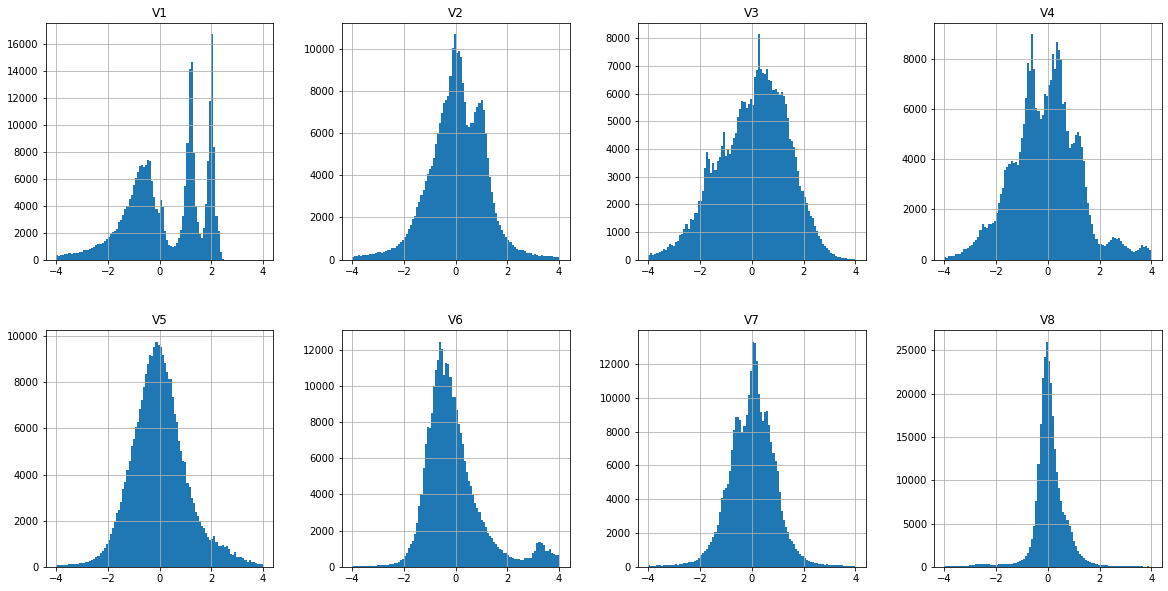

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
df.hist('V1', bins=100, range=(-4,4), ax=axes[0,0])
df.hist('V2', bins=100, range=(-4,4), ax=axes[0,1])
df.hist('V3', bins=100, range=(-4,4), ax=axes[0,2])
df.hist('V4', bins=100, range=(-4,4), ax=axes[0,3])
df.hist('V5', bins=100, range=(-4,4), ax=axes[1,0])
df.hist('V6', bins=100, range=(-4,4), ax=axes[1,1])
df.hist('V7', bins=100, range=(-4,4), ax=axes[1,2])
df.hist('V8', bins=100, range=(-4,4), ax=axes[1,3])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb037618a90>],
      dtype=object)

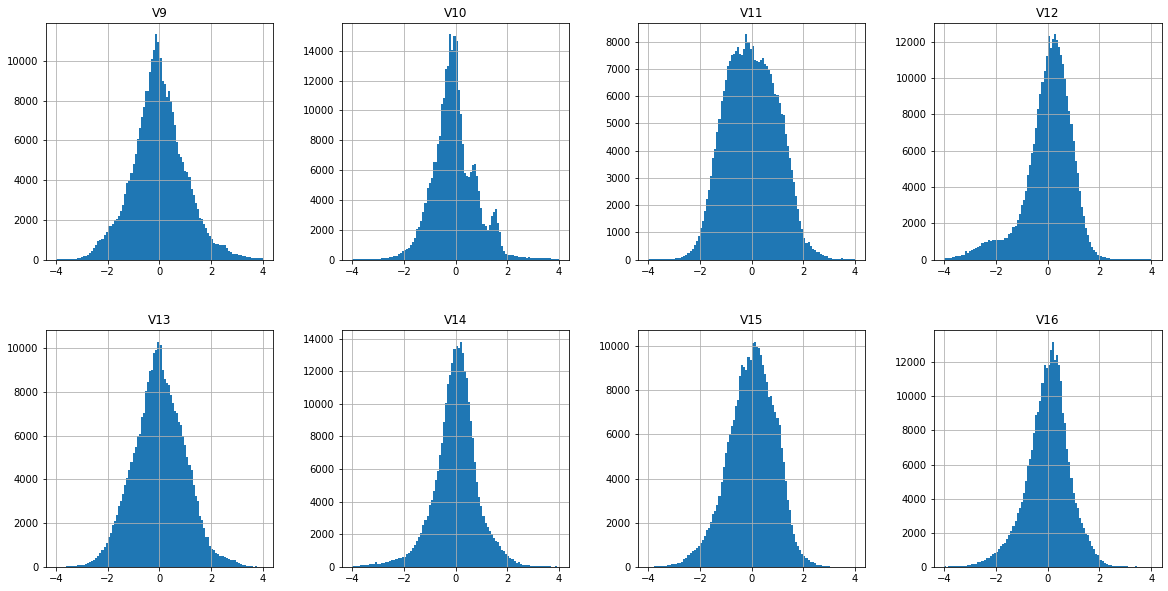

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
df.hist('V9', bins=100, range=(-4,4), ax=axes[0,0])
df.hist('V10', bins=100, range=(-4,4), ax=axes[0,1])
df.hist('V11', bins=100, range=(-4,4), ax=axes[0,2])
df.hist('V12', bins=100, range=(-4,4), ax=axes[0,3])
df.hist('V13', bins=100, range=(-4,4), ax=axes[1,0])
df.hist('V14', bins=100, range=(-4,4), ax=axes[1,1])
df.hist('V15', bins=100, range=(-4,4), ax=axes[1,2])
df.hist('V16', bins=100, range=(-4,4), ax=axes[1,3])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb0369fbf90>],
      dtype=object)

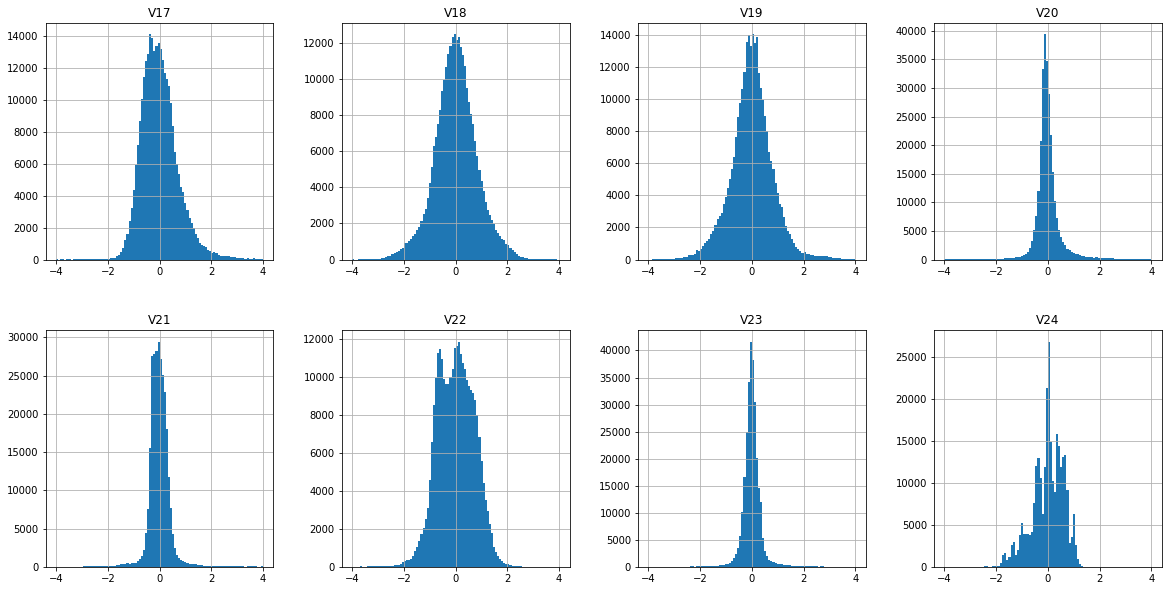

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
df.hist('V17', bins=100, range=(-4,4), ax=axes[0,0])
df.hist('V18', bins=100, range=(-4,4), ax=axes[0,1])
df.hist('V19', bins=100, range=(-4,4), ax=axes[0,2])
df.hist('V20', bins=100, range=(-4,4), ax=axes[0,3])
df.hist('V21', bins=100, range=(-4,4), ax=axes[1,0])
df.hist('V22', bins=100, range=(-4,4), ax=axes[1,1])
df.hist('V23', bins=100, range=(-4,4), ax=axes[1,2])
df.hist('V24', bins=100, range=(-4,4), ax=axes[1,3])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb035e02650>],
      dtype=object)

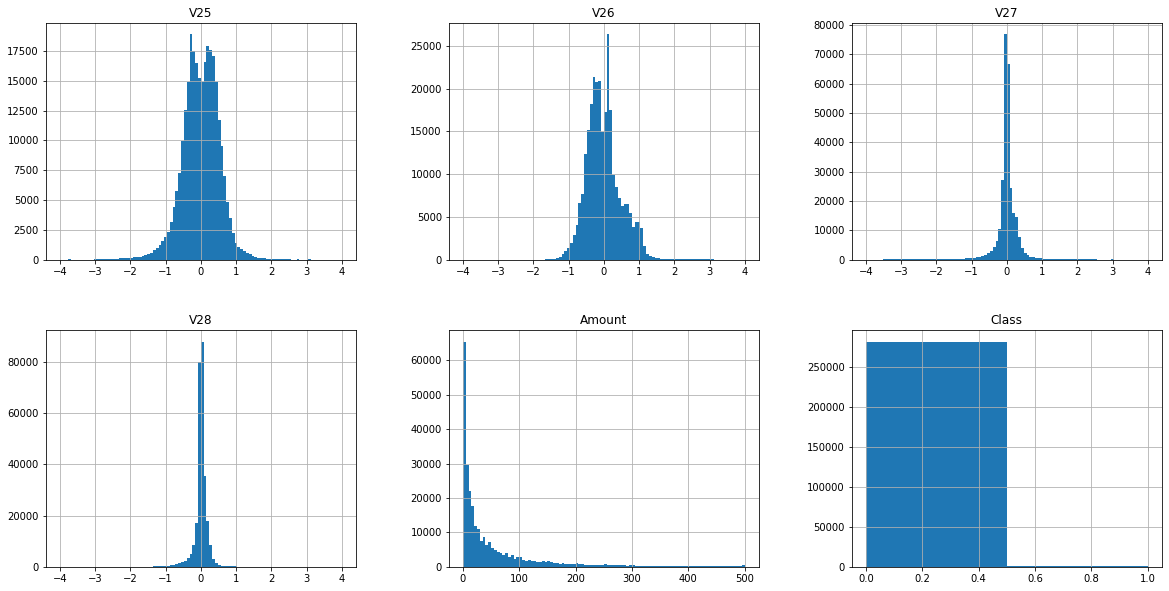

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
df.hist('V25', bins=100, range=(-4,4), ax=axes[0,0])
df.hist('V26', bins=100, range=(-4,4), ax=axes[0,1])
df.hist('V27', bins=100, range=(-4,4), ax=axes[0,2])
df.hist('V28', bins=100, range=(-4,4), ax=axes[1,0])
df.hist('Amount', bins=100, range=(0,500), ax=axes[1,1])
df.hist('Class', bins=2, range=(0,1), ax=axes[1,2])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb0357b6cd0>]],
      dtype=object)

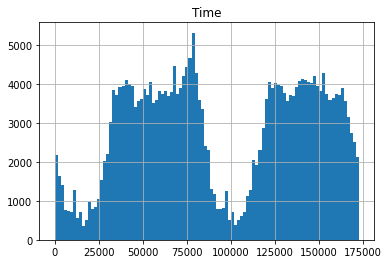

In [ ]:
df.hist('Time', bins=100)

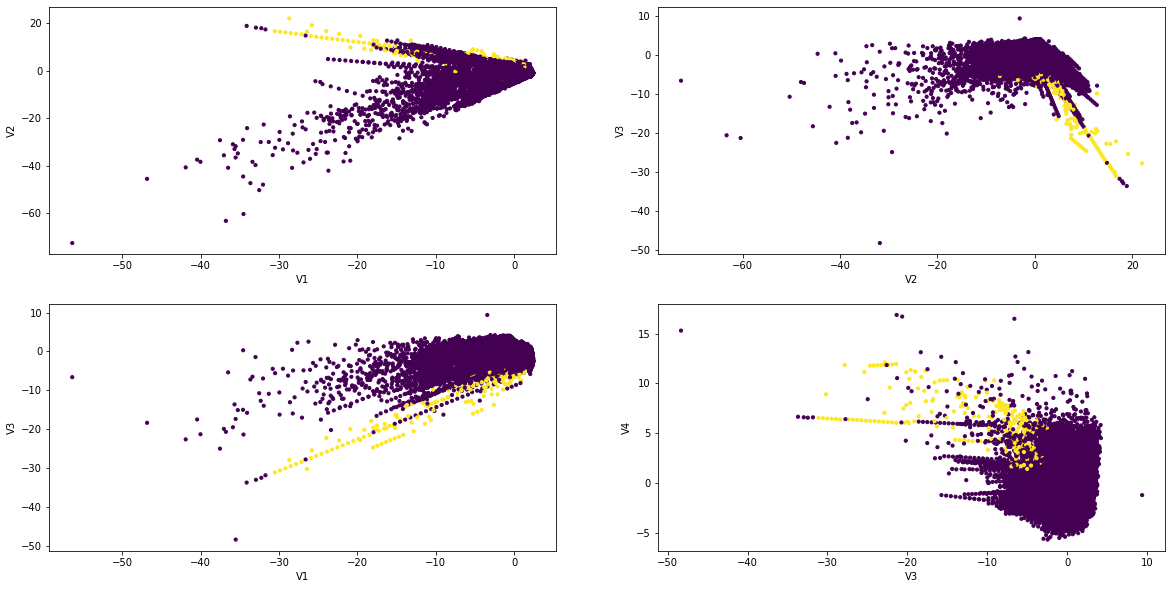

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
ax[0, 0].scatter(x = df['V1'], y = df['V2'], s=10, c=df['Class'])
ax[0, 0].set_xlabel("V1")
ax[0, 0].set_ylabel("V2")

ax[0, 1].scatter(x = df['V2'], y = df['V3'], s=10, c=df['Class'])
ax[0, 1].set_xlabel("V2")
ax[0, 1].set_ylabel("V3")

ax[1, 0].scatter(x = df['V1'], y = df['V3'], s=10, c=df['Class'])
ax[1, 0].set_xlabel("V1")
ax[1, 0].set_ylabel("V3")

ax[1, 1].scatter(x = df['V3'], y = df['V4'], s=10, c=df['Class'])
ax[1, 1].set_xlabel("V3")
ax[1, 1].set_ylabel("V4")

plt.show()

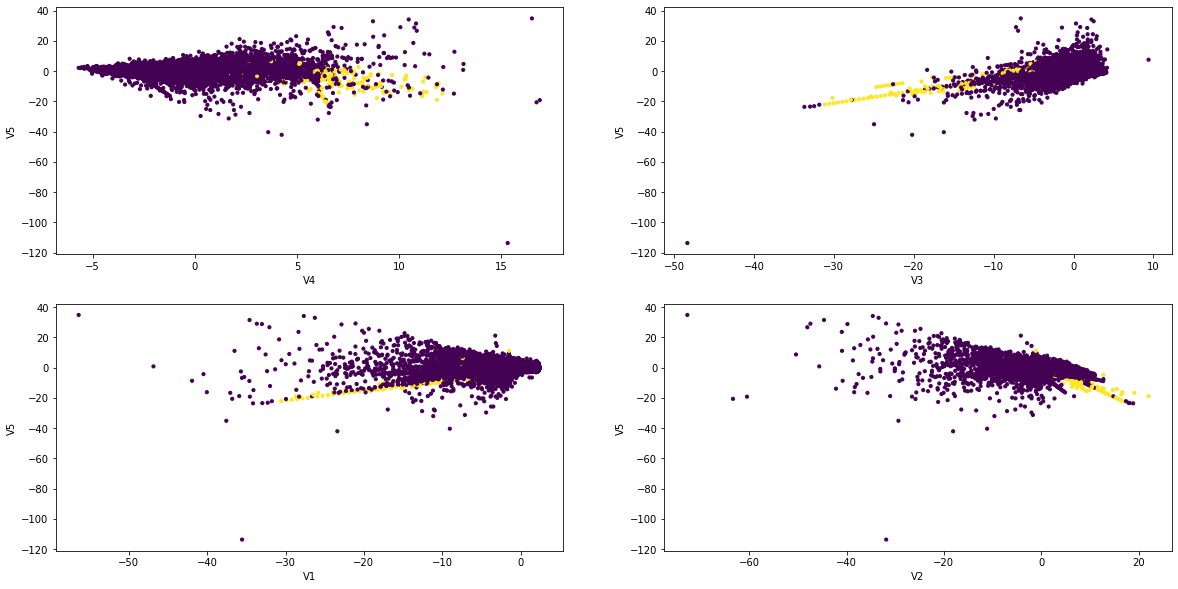

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
ax[0, 0].scatter(x = df['V4'], y = df['V5'], s=10, c=df['Class'])
ax[0, 0].set_xlabel("V4")
ax[0, 0].set_ylabel("V5")

ax[0, 1].scatter(x = df['V3'], y = df['V5'], s=10, c=df['Class'])
ax[0, 1].set_xlabel("V3")
ax[0, 1].set_ylabel("V5")

ax[1, 0].scatter(x = df['V1'], y = df['V5'], s=10, c=df['Class'])
ax[1, 0].set_xlabel("V1")
ax[1, 0].set_ylabel("V5")

ax[1, 1].scatter(x = df['V2'], y = df['V5'], s=10, c=df['Class'])
ax[1, 1].set_xlabel("V2")
ax[1, 1].set_ylabel("V5")

plt.show()

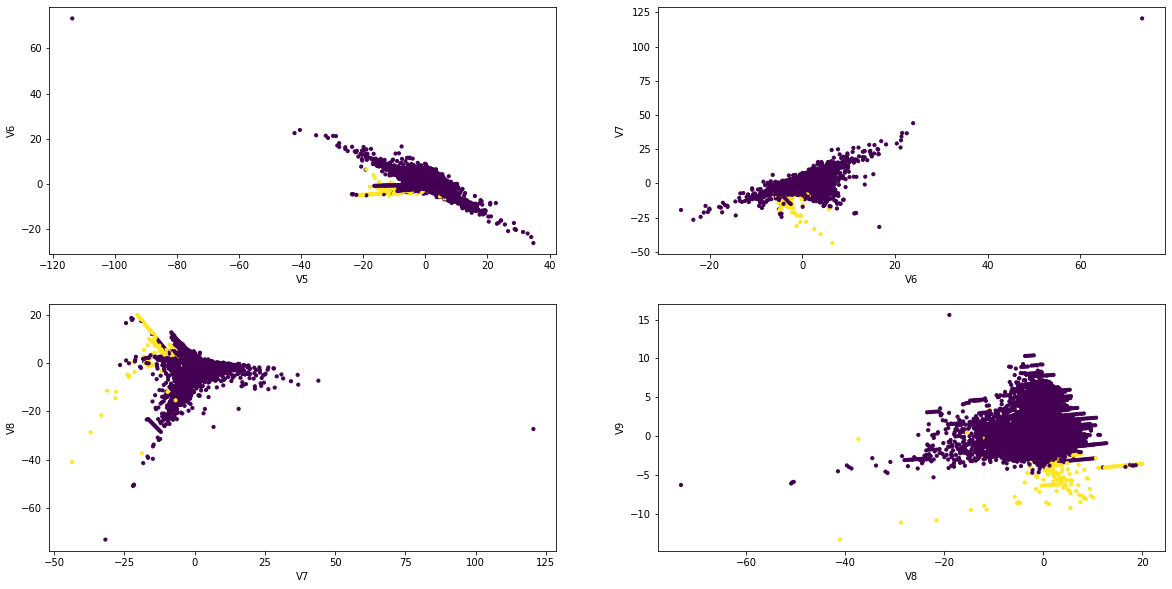

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
ax[0, 0].scatter(x = df['V5'], y = df['V6'], s=10, c=df['Class'])
ax[0, 0].set_xlabel("V5")
ax[0, 0].set_ylabel("V6")

ax[0, 1].scatter(x = df['V6'], y = df['V7'], s=10, c=df['Class'])
ax[0, 1].set_xlabel("V6")
ax[0, 1].set_ylabel("V7")

ax[1, 0].scatter(x = df['V7'], y = df['V8'], s=10, c=df['Class'])
ax[1, 0].set_xlabel("V7")
ax[1, 0].set_ylabel("V8")

ax[1, 1].scatter(x = df['V8'], y = df['V9'], s=10, c=df['Class'])
ax[1, 1].set_xlabel("V8")
ax[1, 1].set_ylabel("V9")

plt.show()

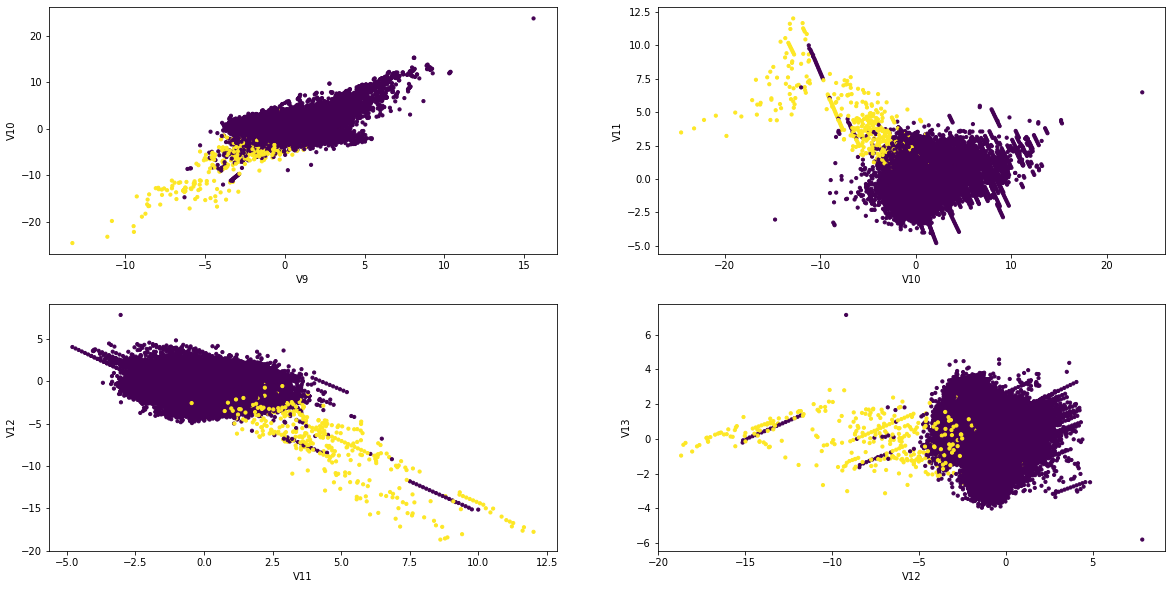

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
ax[0, 0].scatter(x = df['V9'], y = df['V10'], s=10, c=df['Class'])
ax[0, 0].set_xlabel("V9")
ax[0, 0].set_ylabel("V10")

ax[0, 1].scatter(x = df['V10'], y = df['V11'], s=10, c=df['Class'])
ax[0, 1].set_xlabel("V10")
ax[0, 1].set_ylabel("V11")

ax[1, 0].scatter(x = df['V11'], y = df['V12'], s=10, c=df['Class'])
ax[1, 0].set_xlabel("V11")
ax[1, 0].set_ylabel("V12")

ax[1, 1].scatter(x = df['V12'], y = df['V13'], s=10, c=df['Class'])
ax[1, 1].set_xlabel("V12")
ax[1, 1].set_ylabel("V13")

plt.show()

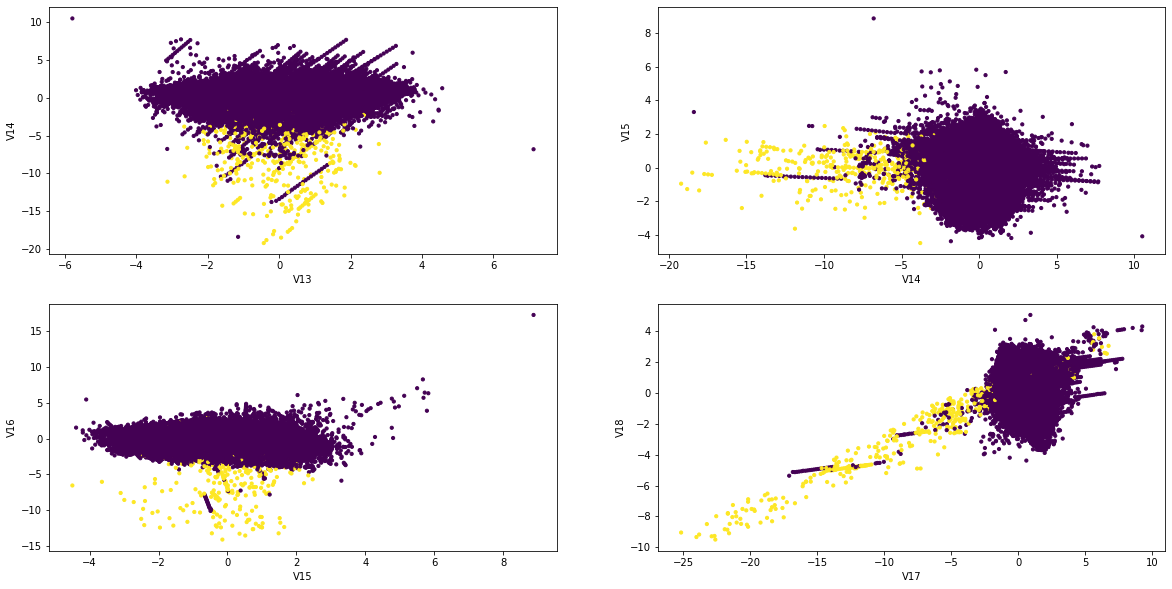

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
ax[0, 0].scatter(x = df['V13'], y = df['V14'], s=10, c=df['Class'])
ax[0, 0].set_xlabel("V13")
ax[0, 0].set_ylabel("V14")

ax[0, 1].scatter(x = df['V14'], y = df['V15'], s=10, c=df['Class'])
ax[0, 1].set_xlabel("V14")
ax[0, 1].set_ylabel("V15")

ax[1, 0].scatter(x = df['V15'], y = df['V16'], s=10, c=df['Class'])
ax[1, 0].set_xlabel("V15")
ax[1, 0].set_ylabel("V16")

ax[1, 1].scatter(x = df['V17'], y = df['V18'], s=10, c=df['Class'])
ax[1, 1].set_xlabel("V17")
ax[1, 1].set_ylabel("V18")

plt.show()

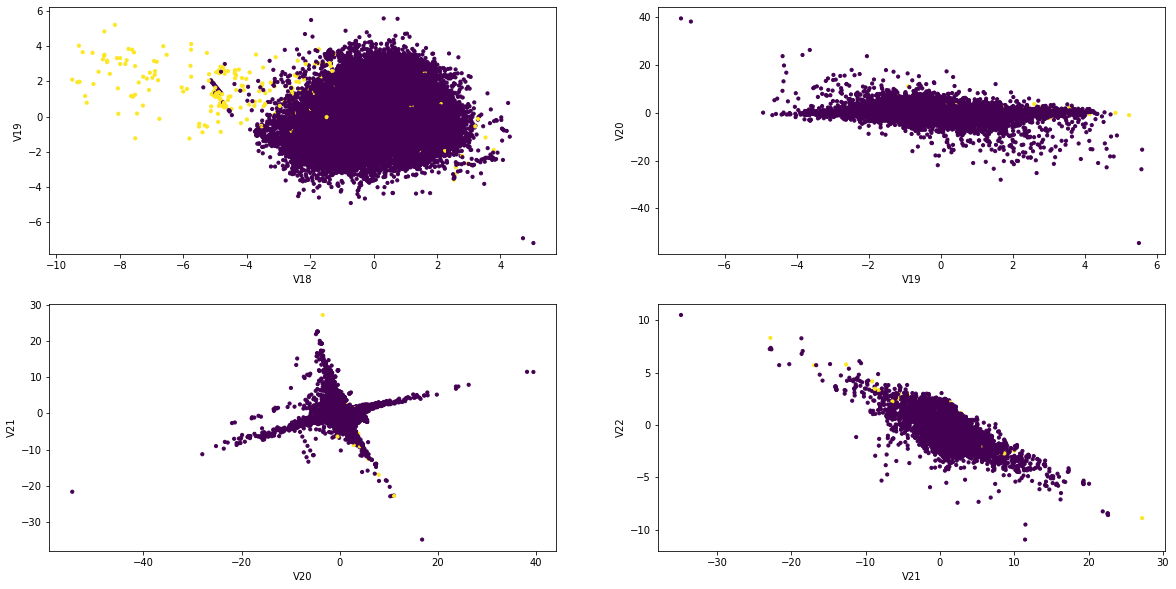

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
ax[0, 0].scatter(x = df['V18'], y = df['V19'], s=10, c=df['Class'])
ax[0, 0].set_xlabel("V18")
ax[0, 0].set_ylabel("V19")

ax[0, 1].scatter(x = df['V19'], y = df['V20'], s=10, c=df['Class'])
ax[0, 1].set_xlabel("V19")
ax[0, 1].set_ylabel("V20")

ax[1, 0].scatter(x = df['V20'], y = df['V21'], s=10, c=df['Class'])
ax[1, 0].set_xlabel("V20")
ax[1, 0].set_ylabel("V21")

ax[1, 1].scatter(x = df['V21'], y = df['V22'], s=10, c=df['Class'])
ax[1, 1].set_xlabel("V21")
ax[1, 1].set_ylabel("V22")

plt.show()

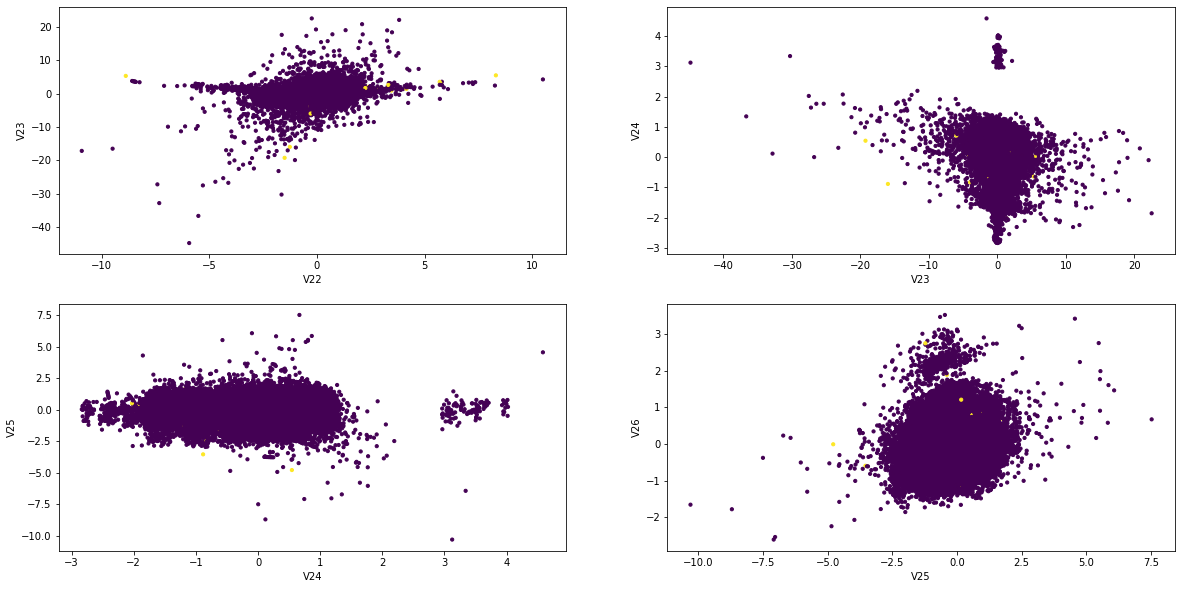

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
ax[0, 0].scatter(x = df['V22'], y = df['V23'], s=10, c=df['Class'])
ax[0, 0].set_xlabel("V22")
ax[0, 0].set_ylabel("V23")

ax[0, 1].scatter(x = df['V23'], y = df['V24'], s=10, c=df['Class'])
ax[0, 1].set_xlabel("V23")
ax[0, 1].set_ylabel("V24")

ax[1, 0].scatter(x = df['V24'], y = df['V25'], s=10, c=df['Class'])
ax[1, 0].set_xlabel("V24")
ax[1, 0].set_ylabel("V25")

ax[1, 1].scatter(x = df['V25'], y = df['V26'], s=10, c=df['Class'])
ax[1, 1].set_xlabel("V25")
ax[1, 1].set_ylabel("V26")

plt.show()

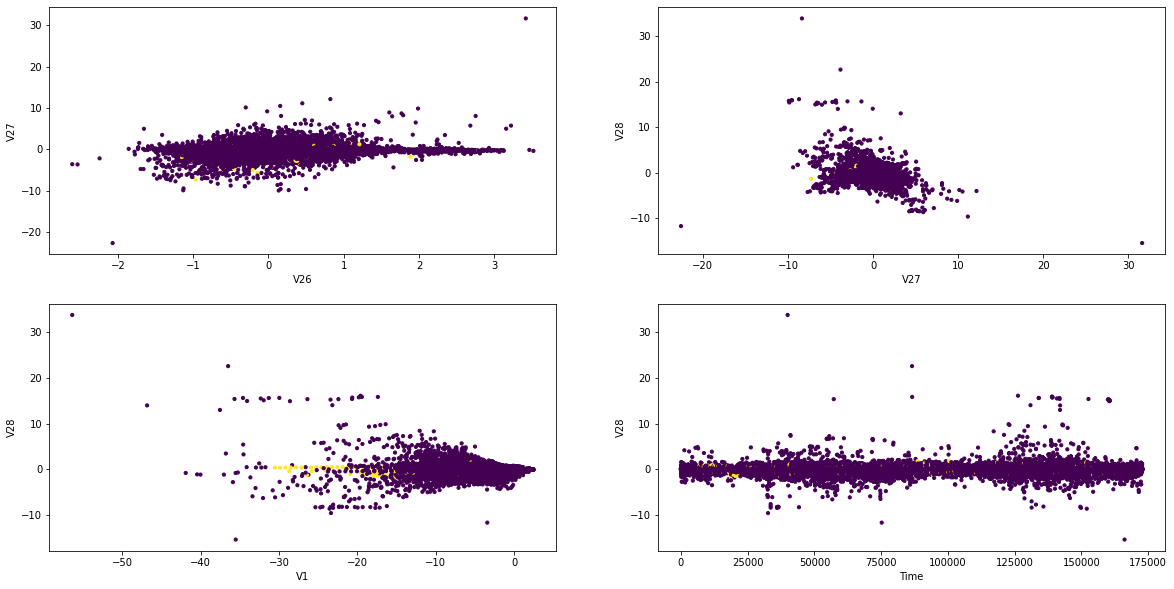

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
ax[0, 0].scatter(x = df['V26'], y = df['V27'], s=10, c=df['Class'])
ax[0, 0].set_xlabel("V26")
ax[0, 0].set_ylabel("V27")

ax[0, 1].scatter(x = df['V27'], y = df['V28'], s=10, c=df['Class'])
ax[0, 1].set_xlabel("V27")
ax[0, 1].set_ylabel("V28")

ax[1, 0].scatter(x = df['V1'], y = df['V28'], s=10, c=df['Class'])
ax[1, 0].set_xlabel("V1")
ax[1, 0].set_ylabel("V28")

ax[1, 1].scatter(x = df['Time'], y = df['V28'], s=10, c=df['Class'])
ax[1, 1].set_xlabel("Time")
ax[1, 1].set_ylabel("V28")

plt.show()

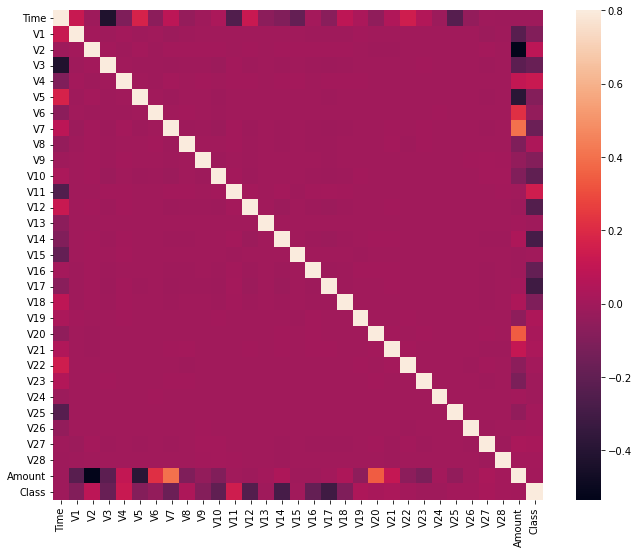

In [ ]:
# heat map of correlation of features
correlation_matrix = df.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix,vmax=0.8,square = True)
plt.show()

# Clustering for Controlled Random Sampling

In [ ]:
from sklearn import model_selection

def data_split(data_set):
  x, validation = model_selection.train_test_split(data_set, test_size=0.2)
  train, test = model_selection.train_test_split(x, test_size=0.125)
  return train, validation, test

In [ ]:
# class count
class_count_0, class_count_1 = df['Class'].value_counts()

# Separate class
class_0 = df[df['Class'] == 0]
class_1 = df[df['Class'] == 1]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (281470, 31)
class 1: (448, 31)


In [ ]:
class_0_quarter=KMeans(n_clusters=4, random_state=0).fit(class_0)

In [ ]:
class_0_0=class_0[class_0_quarter.labels_==0]
class_0_1=class_0[class_0_quarter.labels_==1]
class_0_2=class_0[class_0_quarter.labels_==2]
class_0_3=class_0[class_0_quarter.labels_==3]

In [ ]:
#select points 112 * 4 ponits from 4 clusters
class_0_112points_0=class_0_0.sample(n=112,replace=False, weights=None, random_state=0, axis=0)
class_0_112points_1=class_0_1.sample(n=112,replace=False, weights=None, random_state=0, axis=0)
class_0_112points_2=class_0_2.sample(n=112,replace=False, weights=None, random_state=0, axis=0)
class_0_112points_3=class_0_3.sample(n=112,replace=False, weights=None, random_state=0, axis=0)

In [ ]:
frames=[class_0_112points_0,class_0_112points_1,class_0_112points_2,class_0_112points_3,class_1]
class_896points=pd.concat(frames)

In [ ]:
#This is our balanced data
class_896points

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
31803,36704.0,-2.389241,-1.751458,2.683196,-0.638841,0.558947,1.379172,0.033889,0.301199,1.645825,...,-0.182410,0.870740,0.948533,-0.578193,0.221830,1.195395,-0.236985,-0.550396,73.13,0
50179,44667.0,-2.451616,1.973770,0.902784,1.595978,-1.805211,0.841257,-1.597407,2.246228,0.095427,...,-0.147537,-0.462306,0.152206,0.207392,-0.017109,-0.409981,-0.230704,-0.022505,3.99,0
51826,45481.0,1.222482,0.225622,0.157272,0.936745,-0.150264,-0.480770,0.035762,-0.003801,-0.090520,...,0.045559,0.089681,-0.139484,-0.013992,0.664354,-0.321966,0.002286,0.004644,5.00,0
24006,33169.0,1.312768,-0.757799,0.965769,-0.534125,-1.622036,-0.694954,-0.972068,-0.048753,-0.384858,...,-0.209570,-0.162207,0.041862,0.421977,0.052213,1.106535,-0.028524,0.022979,29.98,0
59001,48972.0,-0.195210,1.778795,0.255266,2.890178,0.146029,-0.663311,0.585447,0.222652,-1.680377,...,0.179058,0.597973,0.094613,0.411936,-0.989843,0.099553,0.368015,0.247422,1.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277027,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
277303,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
277309,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
278285,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [ ]:
from sklearn.utils import shuffle
shuffled_data = shuffle(class_896points)

In [ ]:
shuffled_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
105022,69866.0,-1.534438,1.500176,0.857480,1.400216,-0.378992,-0.303781,0.019725,0.689968,-0.238097,...,-0.016327,0.321613,0.030343,0.424600,-0.050812,-0.271094,0.020517,-0.104559,3.92,0
43671,41851.0,-19.139733,9.286847,-20.134992,7.818673,-15.652208,-1.668348,-21.340478,0.641900,-8.550110,...,-2.182692,0.520543,-0.760556,0.662767,-0.948454,0.121796,-3.381843,-1.256524,139.90,1
269747,165132.0,-7.503926,-0.360628,-3.830952,2.486103,2.497367,1.332437,-6.783964,-15.415385,0.465512,...,-6.389132,2.249964,1.670508,0.140450,0.162147,1.207731,1.268958,0.097538,12.31,1
44028,42009.0,-1.726598,0.580919,0.957876,0.024903,-0.001830,1.697735,0.696595,0.582371,0.206662,...,-0.155215,0.218027,0.185264,-0.929991,-0.326858,0.326863,-0.104304,-0.242860,147.09,0
277303,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152237,100223.0,-19.641857,14.706335,-22.801238,12.114672,-14.898113,0.840778,-28.011293,-11.919639,-8.960922,...,-8.228874,3.318178,2.585212,0.195009,-1.194803,0.038423,-4.126746,-0.645329,2.28,1
77738,57629.0,1.249695,-0.127324,0.340767,0.013567,-0.701564,-0.809219,-0.260784,0.007549,0.215039,...,0.094210,0.210550,-0.063798,0.371968,0.319226,1.103282,-0.095605,-0.012686,2.92,0
14969,26523.0,-18.474868,11.586381,-21.402917,6.038515,-14.451158,-4.146524,-14.856124,12.431140,-4.053353,...,1.741136,-1.251138,-0.396219,0.095706,1.322751,-0.217955,1.628793,0.482248,99.99,1
234944,149236.0,-1.370976,-0.025465,-2.774907,2.650530,4.511309,-3.289344,-0.118841,-0.014279,-0.932773,...,-0.048061,-0.599350,0.072193,-0.600351,0.371331,-0.370951,0.011970,0.145895,1.00,1


In [ ]:
train, validation, test = data_split(shuffled_data)

In [ ]:
train_x = train.drop(columns=['Class'])
train_y = train['Class']

In [ ]:
validation_x = validation.drop(columns=['Class'])
validation_y = validation['Class']

In [ ]:
test_x = test.drop(columns=['Class'])
test_y = test['Class']

In [ ]:
test_x

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
19934,30852.0,-2.830984,0.885657,1.199930,2.861292,0.321669,0.289966,1.767760,-2.451050,0.069736,...,-1.016923,0.546589,0.334971,0.172106,0.623590,-0.527114,-0.079215,-2.532445,0.311177,104.81
173691,122379.0,2.122958,0.747277,-3.308327,0.629699,1.505295,-1.370424,0.863890,-0.490443,-0.087795,...,-0.067181,-0.074390,0.043699,-0.084556,0.267991,0.457365,0.700298,-0.073139,-0.014658,0.76
146026,88672.0,-3.859881,2.632881,-5.264265,3.446113,-0.675231,-1.904959,-3.291041,-0.985766,-1.168114,...,-0.178626,1.664119,0.785075,0.068412,0.778961,-0.863166,-0.006810,-1.065734,1.773326,1.18
31360,36516.0,1.096881,-0.203834,0.719152,0.905904,-0.793923,-0.391989,-0.258054,0.109121,0.755172,...,-0.205953,-0.250637,-0.671734,0.140547,0.385190,0.153044,0.192226,-0.015094,0.018757,36.95
224425,144808.0,-2.405207,2.943823,-7.616654,3.533374,-5.417494,-0.112632,-1.329372,1.709417,-2.322716,...,-0.338707,0.652683,0.414132,0.023869,-0.260616,0.405316,0.029107,0.519807,-0.469537,667.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13133,23472.0,-0.652496,1.295024,1.591470,0.152057,-0.140910,-0.710183,0.269559,-0.872299,1.107490,...,-0.177974,0.372112,-1.123235,0.110747,0.258337,-0.231732,0.042558,0.267944,0.119879,1.78
64796,51655.0,-2.247176,0.902280,1.003101,-1.272899,-0.773139,1.159899,0.019086,0.741896,0.988462,...,-0.514037,-0.288276,-0.505294,-0.252171,-1.258542,0.204189,0.841854,-1.437836,-0.852476,110.12
117334,75148.0,-1.685934,0.556682,0.780941,0.559922,1.044400,-1.433261,0.167179,0.430757,-0.879633,...,0.062823,0.167407,0.011059,-0.302888,0.300125,0.686213,-0.412742,-0.105285,-0.218707,1.00
11534,20011.0,-14.724627,7.875157,-21.872317,11.906170,-8.348734,-2.262846,-15.833443,0.077874,-6.356833,...,0.996469,-2.362345,1.099557,1.037199,-1.036359,-0.254777,0.642343,2.161129,-1.401282,1.00


In [ ]:
test_y

19934     1
173691    0
146026    1
31360     0
224425    1
         ..
13133     0
64796     0
117334    0
11534     1
9346      1
Name: Class, Length: 90, dtype: int64

In [ ]:
type(test_y)

pandas.core.series.Series

#Run this cell

In [ ]:
#run this cell
train_x = pd.read_csv('/content/drive/Shareddrives/ENGS108/train_x.csv', index_col=0)
train_y = pd.read_csv('/content/drive/Shareddrives/ENGS108/train_y.csv')
validation_x = pd.read_csv('/content/drive/Shareddrives/ENGS108/validation_x.csv', index_col=0)
validation_y = pd.read_csv('/content/drive/Shareddrives/ENGS108/validation_y.csv')
test_x = pd.read_csv('/content/drive/Shareddrives/ENGS108/test_x.csv', index_col=0)
test_y = pd.read_csv('/content/drive/Shareddrives/ENGS108/test_y.csv')

In [ ]:
test_y

,Class
0,1
1,0
2,0
3,1
4,0
...,...
85,1
86,0
87,1
88,0


In [ ]:
from sklearn.metrics.pairwise import normalize
train_x_norm = normalize(train_x)
validation_x_norm = normalize(validation_x)
test_x_norm = normalize(test_x)

In [ ]:
train_unbalanced_class_0, validation_unbalanced_class_0, test_unbalanced_class_0 = data_split(class_0)
train_unbalanced_class_1, validation_unbalanced_class_1, test_unbalanced_class_1 = data_split(class_1)

In [ ]:
train_unbalanced_class_0_x = train_unbalanced_class_0.drop(columns=['Class'])
train_unbalanced_class_0_y = train_unbalanced_class_0['Class']

validation_unbalanced_class_0_x = validation_unbalanced_class_0.drop(columns=['Class'])
validation_unbalanced_class_0_y = validation_unbalanced_class_0['Class']

test_unbalanced_class_0_x = test_unbalanced_class_0.drop(columns=['Class'])
test_unbalanced_class_0_y = test_unbalanced_class_0['Class']

train_unbalanced_class_1_x = train_unbalanced_class_1.drop(columns=['Class'])
train_unbalanced_class_1_y = train_unbalanced_class_1['Class']

validation_unbalanced_class_1_x = validation_unbalanced_class_1.drop(columns=['Class'])
validation_unbalanced_class_1_y = validation_unbalanced_class_1['Class']

test_unbalanced_class_1_x = test_unbalanced_class_1.drop(columns=['Class'])
test_unbalanced_class_1_y = test_unbalanced_class_1['Class']

In [ ]:
norm_train_unbalanced_class_0_x = normalize(train_unbalanced_class_0_x)
norm_validation_unbalanced_class_0_x = normalize(validation_unbalanced_class_0_x)
norm_test_unbalanced_class_0_x = normalize(test_unbalanced_class_0_x)

norm_train_unbalanced_class_1_x = normalize(train_unbalanced_class_1_x)
norm_validation_unbalanced_class_1_x = normalize(validation_unbalanced_class_1_x)
norm_test_unbalanced_class_1_x = normalize(test_unbalanced_class_1_x)

# KNN

In [ ]:
def KNN_test(train_x, train_y, validation_x, validation_y, k, m, n):
  KNN = sklearn.neighbors.KNeighborsClassifier(n_neighbors=k, n_jobs=m, leaf_size=n)
  KNN.fit(train_x, train_y)
  y_pred = KNN.predict(validation_x)
  acc = metrics.accuracy_score(validation_y, y_pred)
  model = KNN
  return acc, y_pred, model

In [ ]:
acc, y_pred, knn_model = KNN_test(train_x_norm, train_y, validation_x_norm, validation_y, k=5, m=15, n=40)
print('test accuracy:', acc)

test accuracy: 0.8611111111111112


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
KNN = sklearn.neighbors.KNeighborsClassifier()

params = {'n_neighbors': [5, 6, 7, 8, 10, 15, 20], 'leaf_size': [20, 30, 40, 50], 'n_jobs' : [10, 15, 16, 18, 20]}

rs_model=RandomizedSearchCV(KNN,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

#model fitting
rs_model.fit(train_x_norm, train_y)

#parameters selected
print(rs_model.best_estimator_)

print (rs_model.best_score_)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
KNeighborsClassifier(leaf_size=50, n_jobs=18, n_neighbors=8)
0.9255796553173603


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


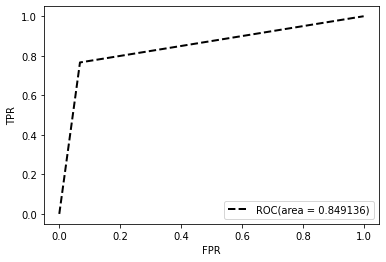

In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()
lw = 2
fpr, tpr, thresholds = roc_curve(validation_y, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, 'k--', label = 'ROC(area = {0:2f})'.format(roc_auc), lw=2)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc = 'lower right')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


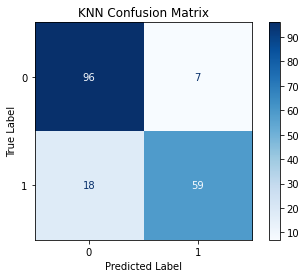

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

color = 'black'
matrix = plot_confusion_matrix(knn_model, validation_x_norm, validation_y, cmap=plt.cm.Blues)
matrix.ax_.set_title('KNN Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print(precision_score(validation_y, y_pred, average='macro'))

print(recall_score(validation_y, y_pred, average='macro'))

0.8680223285486444
0.8491363005926114


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

def random_forest(train_x, train_y, validation_x, validation_y, n_est=100):
  clf = RandomForestClassifier(n_estimators = n_est, min_samples_split=2, min_samples_leaf=4, max_depth=90, bootstrap=True) 
  clf.fit(train_x, train_y)
  y_pred = clf.predict(validation_x)
  accuracy = metrics.accuracy_score(validation_y, y_pred)
  model = clf
  return accuracy, y_pred, model

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


0.9333333333333333


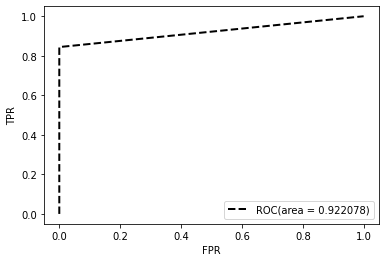

In [ ]:
validation_accuracy, y_pred,random_forest_model = random_forest(train_x_norm, train_y, validation_x_norm, validation_y, 30)
print(validation_accuracy)
fpr = dict()
tpr = dict()
roc_auc = dict()
lw = 2
fpr, tpr, thresholds = roc_curve(validation_y, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, 'k--', label = 'ROC(area = {0:2f})'.format(roc_auc), lw=2)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc = 'lower right')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


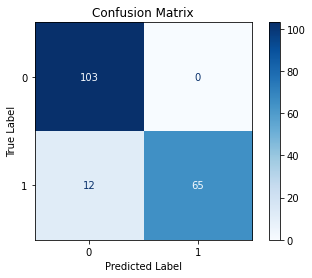

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

color = 'black'
matrix = plot_confusion_matrix(random_forest_model, validation_x_norm, validation_y, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print(precision_score(validation_y, y_pred, average='macro'))

print(recall_score(validation_y, y_pred, average='macro'))

0.9478260869565218
0.922077922077922


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Create a search grid of parameters that will be shuffled through

n_estimators = [5, 10, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 30, 35, 40] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 3, 4, 5, 6, 7, 8, 9,10] # minimum sample number to split a node
min_samples_leaf = [1, 2, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

rf = RandomForestClassifier()

rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)
rf_random.fit(train_x_norm, train_y)

print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Random grid:  {'n_estimators': [5, 10, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 30, 35, 40], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_leaf': [1, 2, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 20, 'min_samples_split': 6, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 80, 'bootstrap': True}  



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


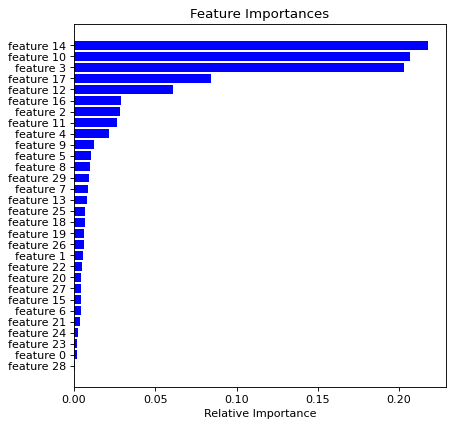

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(6, 6), dpi=80)

features = [f"feature {i}" for i in range(train_x.shape[1])]
importances = random_forest_model.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

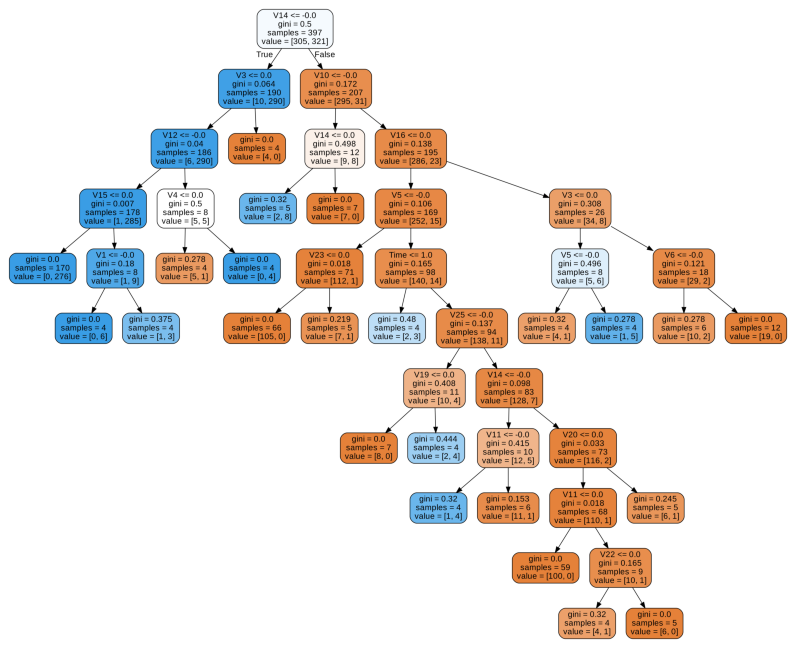

In [ ]:
from sklearn.tree import export_graphviz

# Export as dot file
export_graphviz(random_forest_model.estimators_[0], out_file='tree.dot', 
                feature_names = train_x.columns, filled=True,
                rounded=True)

# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in python
import matplotlib.pyplot as plt
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('tree.png'))
plt.axis('off');
plt.show();

# SVM

In [ ]:
from sklearn import svm

def support_vector_machine(train_x, train_y, validation_x, validation_y):
  clf = svm.SVC(C =1000000000, max_iter =  10000)
  clf.fit(train_x, train_y)
  y_pred = clf.predict(validation_x)
  accuracy = metrics.accuracy_score(validation_y, y_pred)
  return accuracy, y_pred, clf

In [ ]:
validation_accuracy, y_pred, svm_model = support_vector_machine(train_x_norm, train_y, validation_x_norm, validation_y)
print(validation_accuracy)

0.8833333333333333


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


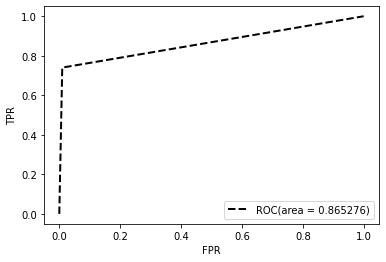

In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()
lw = 2
fpr, tpr, thresholds = roc_curve(validation_y, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, 'k--', label = 'ROC(area = {0:2f})'.format(roc_auc), lw=2)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc = 'lower right')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


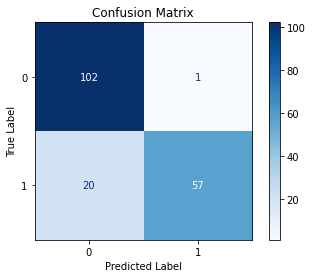

In [ ]:
color = 'black'
matrix = plot_confusion_matrix(svm_model, validation_x_norm, validation_y, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression( penalty='l2', tol=0.00001, C=200000000,random_state=0, max_iter=500, solver='newton-cg').fit(train_x_norm, train_y)
y_pred=lr_clf.predict(validation_x_norm)
#y_pred
#lr_clf.predict_proba(train_x_norm)
print(lr_clf.score(validation_x_norm, validation_y))
print(lr_clf.score(train_x_norm, train_y))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9222222222222223
0.952076677316294


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  ConvergenceWarning,


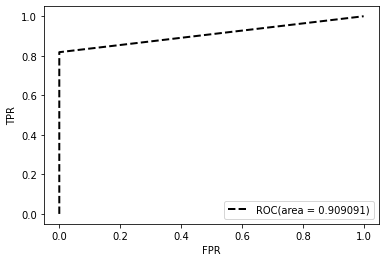

In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()
lw = 2
fpr, tpr, thresholds = roc_curve(validation_y, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, 'k--', label = 'ROC(area = {0:2f})'.format(roc_auc), lw=2)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc = 'lower right')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


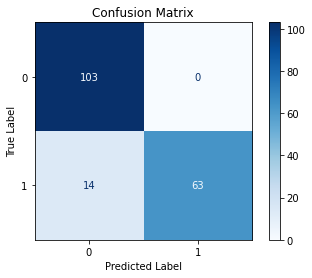

In [ ]:
color = 'black'
matrix = plot_confusion_matrix(lr_clf, validation_x_norm, validation_y, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

In [ ]:
print(precision_score(validation_y, y_pred, average='macro'))

print(recall_score(validation_y, y_pred, average='macro'))

0.9401709401709402
0.9090909090909092


# Anomaly detection

In [ ]:
!pip install pyod

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pyod.models.ecod import ECOD
clf_name = 'ECOD'
clf = ECOD()
clf.fit(train_x_norm)
labels_train=clf.labels_
labels_val = clf.predict(validation_x_norm)
test_scores = clf.decision_function(validation_x_norm)
#print(labels_train)
print(labels_val)
print(test_scores)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[ 33.39499632  31.59651616  45.26477594  31.64808221  33.74089154
  48.89221369  75.78983014  36.56494094  73.31931829  36.87329172
  66.34864265  38.55445129  40.86420383  51.43091456  36.17868538
  85.07040609  66.84533769  61.47043358  40.13197028  49.57251471
  44.39505525  41.89672137 117.2771661   43.95071153  40.76785087
  37.97972346  45.61916528  48.89041754  36.68262665 108.06938625
  37.12611989  83.67588233  75.8199013   42.36176961  34.17994625
  53.79504951  37.09990307  34.50279678  39.84038687  38.74563125
  55.1374928   42.89713517  45.22761488  44.60726146  51.94367475
  33.54080603  40.54832165 106.32590794 

In [ ]:
from pyod.utils.utility import precision_n_scores
from sklearn.metrics import roc_auc_score, recall_score
roc = roc_auc_score(validation_y, labels_val)
prn = precision_n_scores(validation_y, labels_val)
recall = recall_score(validation_y, labels_val)
print(f'{clf_name} ROC:{roc}, precision n:{prn}, recall:{recall}')

ECOD ROC:0.5243979321649225, precision n:0.6666666666666666, recall:0.07792207792207792


In [ ]:
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix

confusion = confusion_matrix(validation_y, labels_val)

In [ ]:
from matplotlib import rcParams

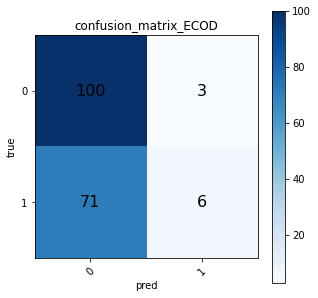

In [ ]:
from numpy.ma.core import indices
plt.figure(figsize = (5,5))
plt.imshow(confusion, cmap = plt.cm.Blues)
plt.colorbar()

indices = range(len(confusion))
plt.xticks(indices, rotation = 45)
plt.yticks(indices)

plt.xlabel('pred')
plt.ylabel('true')
plt.title('confusion_matrix_ECOD', fontsize=12)

normalize = False
thresh = confusion.max()/2
for i in range(len(confusion)):
  for j in range(len(confusion)):
    plt.text(j,i, format(confusion[i][j]),
             fontsize = 16,
             horizontalalignment = 'center',
             verticalalignment = 'center'
             )
plt.show()

In [ ]:
from pyod.models.copod import COPOD
clf_name_ = 'COPOD'
clf = COPOD()
clf.fit(train_x_norm)
labels_train_copod = clf.labels_
labels_val_copod = clf.predict(validation_x_norm)
test_scores_copod = clf.decision_function(validation_x_norm) 
print(test_scores_copod)
print(labels_val_copod)

[27.32239762 28.93469109 41.12534263 25.41714078 28.4501807  39.24627134
 52.58529359 29.70171234 56.22811632 30.64360011 53.71248539 30.81657587
 33.03445401 42.14261248 30.40117899 67.55511013 55.3409895  49.54659114
 29.1947047  42.91768834 33.92638212 31.3846343  90.4709781  38.02649459
 29.70092305 30.92674971 35.36927105 40.20531818 28.68679735 83.64809624
 28.8246824  69.85240885 60.04080304 33.29014543 28.17854149 43.72516873
 29.01270974 27.63200485 32.19744172 29.67217659 46.62555359 34.57999456
 35.18773787 36.387779   39.48401637 27.14853763 32.26826903 78.8342015
 43.85191069 33.5550956  29.27587165 32.57689415 44.95709262 32.63305438
 30.17056259 31.50402353 37.81232508 31.00719973 36.19923891 54.92566978
 39.98404417 31.72979506 35.53113308 26.30903072 27.27050725 43.53188588
 43.49781473 36.76711359 31.12604596 29.90744728 27.21602471 38.00822502
 38.22246652 30.32463512 48.35572422 47.00782606 39.52434852 28.57095766
 29.81644461 53.06936105 34.26849769 28.7720266  27.

In [ ]:
roc = roc_auc_score(validation_y, labels_val_copod)
prn = precision_n_scores(validation_y, labels_val_copod)
recall = recall_score(validation_y, labels_val_copod)
print(f'{clf_name_} ROC:{roc}, precision n:{prn}, recall:{recall}')

COPOD ROC:0.5243979321649225, precision n:0.6666666666666666, recall:0.07792207792207792


In [ ]:
conf = confusion_matrix(validation_y, labels_val_copod)

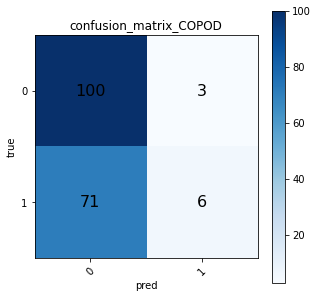

In [ ]:
from numpy.ma.core import indices
plt.figure(figsize = (5,5))
plt.imshow(conf, cmap = plt.cm.Blues)
plt.colorbar()

indices = range(len(conf))
plt.xticks(indices, rotation = 45)
plt.yticks(indices)

plt.xlabel('pred')
plt.ylabel('true')
plt.title('confusion_matrix_COPOD', fontsize=12)

normalize = False
thresh = conf.max()/2
for i in range(len(conf)):
  for j in range(len(conf)):
    plt.text(j,i, format(conf[i][j]),
             fontsize = 16,
             horizontalalignment = 'center',
             verticalalignment = 'center'
             )
plt.show()

In [ ]:
from pyod.models.iforest import IForest
clf_name_ = 'IForest'
clf = IForest()
clf.fit(train_x_norm)
labels_train_IF = clf.labels_
labels_val_IF = clf.predict(validation_x_norm)
test_scores_IF = clf.decision_function(validation_x_norm) 
print(test_scores_IF)
print(labels_val_IF)

[-0.18622111 -0.17974172 -0.15931039 -0.18647733 -0.18399287 -0.16132211
 -0.05655301 -0.18297398 -0.04036705 -0.18069141 -0.07860494 -0.17990669
 -0.17968114 -0.15680137 -0.18143334 -0.00608361 -0.08274389 -0.08263266
 -0.1848871  -0.17260275 -0.18088965 -0.17985853  0.18721269 -0.16052832
 -0.18525844 -0.18345279 -0.17581407 -0.17479621 -0.18632821  0.11705939
 -0.18640803  0.00331657 -0.03825767 -0.18707732 -0.18411478 -0.1237893
 -0.18538937 -0.18808766 -0.18417354 -0.18562602 -0.15945715 -0.17607785
 -0.17995422 -0.15293883 -0.16752201 -0.18924051 -0.17047684  0.07669017
 -0.13786097 -0.1843344  -0.18686545 -0.17560206 -0.13605898 -0.17814608
 -0.1811809  -0.18485631 -0.17634295 -0.18866908 -0.16502347 -0.06546806
 -0.13715638 -0.18244054 -0.17827306 -0.18697699 -0.18745617 -0.15478313
 -0.14087976 -0.15753947 -0.17769533 -0.17582767 -0.18395119 -0.16636251
 -0.17264104 -0.18617053 -0.13773948 -0.10802051 -0.15525292 -0.18222807
 -0.18406075 -0.0732883  -0.17803257 -0.18688742 -0.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
IForest = IForest()

params = {'n_estimators': [60, 80, 100, 120, 150, 180], 'contamination': [0.1, 0.2, 0.3, 0.4, 0.5]}

rs_model=RandomizedSearchCV(IForest,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

#model fitting
rs_model.fit(train_x_norm, train_y)

#parameters selected
print(rs_model.best_estimator_)

print (rs_model.best_score_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.7/dist-packages/pyod/models/base.py:411: UserWarning: y should not be presented in unsupervised learning.
  "y should not be presented in unsupervised learning.")


IForest(behaviour='old', bootstrap=False, contamination=0.5, max_features=1.0,
    max_samples='auto', n_estimators=180, n_jobs=1, random_state=None,
    verbose=0)
0.7661145699976782


In [ ]:
roc = roc_auc_score(validation_y, labels_val_IF)
prn = precision_n_scores(validation_y, labels_val_IF)
recall = recall_score(validation_y, labels_val_IF)
print(f'{clf_name_} ROC:{roc}, precision n:{prn}, recall:{recall}')

IForest ROC:0.5227587946034548, precision n:0.7142857142857143, recall:0.06493506493506493


In [ ]:
conf_ = confusion_matrix(validation_y, labels_val_IF)

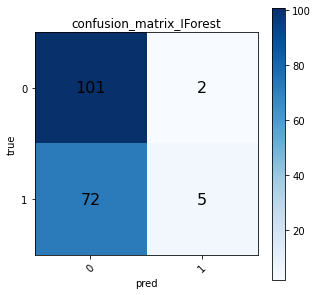

In [ ]:
from numpy.ma.core import indices
plt.figure(figsize = (5,5))
plt.imshow(conf_, cmap = plt.cm.Blues)
plt.colorbar()

indices = range(len(conf_))
plt.xticks(indices, rotation = 45)
plt.yticks(indices)

plt.xlabel('pred')
plt.ylabel('true')
plt.title('confusion_matrix_IForest', fontsize=12)

normalize = False
thresh = conf_.max()/2
for i in range(len(conf_)):
  for j in range(len(conf_)):
    plt.text(j,i, format(conf_[i][j]),
             fontsize = 16,
             horizontalalignment = 'center',
             verticalalignment = 'center'
             )
plt.show()

# XGBoost

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Accuracy: 92.22%


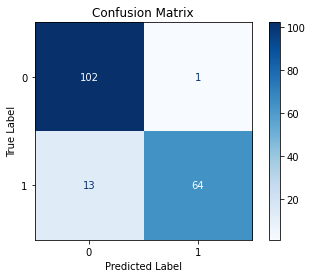

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", colsample_bytree=0.3, gamma=0.5, learning_rate=0.05, max_depth=15, min_child_weight=6, random_state=30)
xgb_model.fit(train_x_norm, train_y)

# make predictions for test data
y_pred = xgb_model.predict(validation_x_norm)
predictions = [round(value) for value in y_pred]

accuracy = metrics.accuracy_score(validation_y, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

color = 'black'
matrix = plot_confusion_matrix(xgb_model, validation_x_norm, validation_y, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

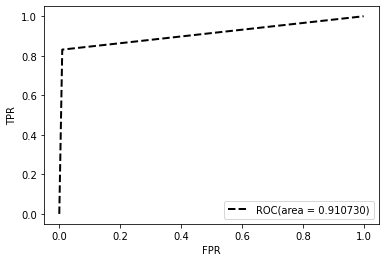

In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()
lw = 2
fpr, tpr, thresholds = roc_curve(validation_y, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, 'k--', label = 'ROC(area = {0:2f})'.format(roc_auc), lw=2)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc = 'lower right')
plt.show()

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print(precision_score(validation_y, y_pred, average='macro'))

print(recall_score(validation_y, y_pred, average='macro'))

0.9357859531772575
0.9107300466523768


In [ ]:
params = {'learning_rate': [0.05,0.10,0.15,0.20,0.25,0.30], 'max_depth': [ 3, 4, 5, 6, 8, 10, 12, 15], 'min_child_weight' : [ 1, 3, 5, 6, 7, 8 ],'gamma': [ 0.0, 0.1, 0.2 , 0.3, 0.4, 0.5, 0.6 ], 'colsample_bytree' : [ 0.3, 0.4, 0.5 , 0.7 ]}

rs_model=RandomizedSearchCV(xgb_model,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

#model fitting
rs_model.fit(train_x_norm, train_y)

#parameters selected

rs_model.best_estimator_


Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(colsample_bytree=0.3, gamma=0.1, learning_rate=0.15,
              min_child_weight=3, random_state=30)

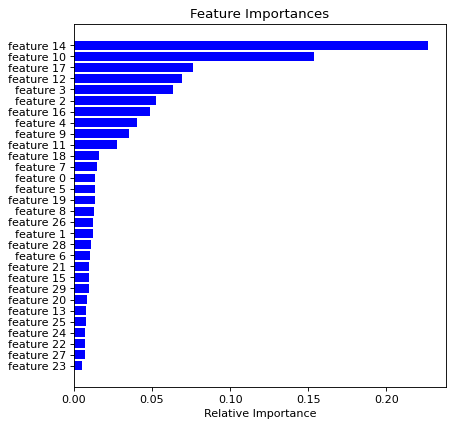

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(6, 6), dpi=80)

features = [f"feature {i}" for i in range(train_x.shape[1])]
importances = xgb_model.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

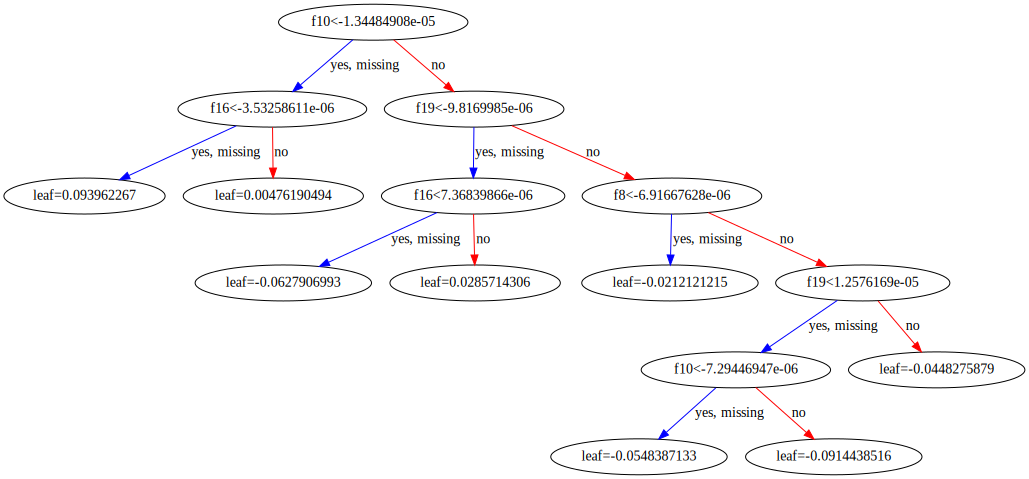

In [ ]:
xgb.to_graphviz(xgb_model)

# Novelty Detection

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm
# fit the model
Novelty_Detection_clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
Novelty_Detection_clf.fit(norm_test_unbalanced_class_0_x)

OneClassSVM(gamma=0.1, nu=0.1)

In [ ]:
y_pred_train = Novelty_Detection_clf.predict(norm_train_unbalanced_class_0_x)
y_pred_validation = Novelty_Detection_clf.predict(norm_validation_unbalanced_class_0_x)
y_pred_validation_outliers = Novelty_Detection_clf.predict(norm_train_unbalanced_class_1_x)
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_validation = y_pred_validation[y_pred_validation == -1].size
n_error_validation_outliers = y_pred_validation_outliers[y_pred_validation_outliers == 1].size

In [ ]:
n_right_train = y_pred_train[y_pred_train == 1].size
n_right_validation = y_pred_validation[y_pred_validation == 1].size
n_right_validation_outliers = y_pred_validation_outliers[y_pred_validation_outliers == -1].size

In [ ]:
TP=n_right_validation
TN=n_right_validation_outliers
FP=n_error_validation_outliers
FN=n_error_validation

mytotal=n_right_validation+n_right_validation_outliers+n_error_validation_outliers+n_error_validation

TP=n_right_validation/mytotal
TN=n_right_validation_outliers/mytotal
FP=n_error_validation_outliers/mytotal
FN=n_error_validation/mytotal

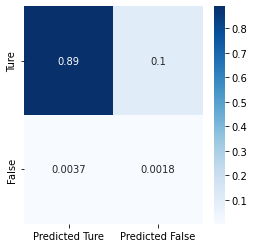

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
array = [[TP,FN], 
        [FP,TN]]
df_cm = pd.DataFrame(array, index = [i for i in ["Ture","False"]],
                  columns = [i for i in ["Predicted Ture","Predicted False"]])
plt.figure(figsize = (4,4))
sn.heatmap(df_cm, annot=True,cmap="Blues")

In [ ]:
print(f'my_precision_score=',TP / (TP + FP))
print(f'my_recall_score=',TP / (TP + FN))

my_precision_score= 0.9958508683539803
my_recall_score= 0.8953529683447614


In [ ]:
norm_validation_unbalanced_class_0_x_pd=pd.DataFrame(norm_validation_unbalanced_class_0_x)
norm_train_unbalanced_class_1_x_pd=pd.DataFrame(norm_train_unbalanced_class_1_x)

validation_unbalanced_class_0_y_pd=pd.DataFrame(validation_unbalanced_class_0_y)
train_unbalanced_class_1_y_pd=pd.DataFrame(train_unbalanced_class_1_y)

combine_for_novelty_x=[norm_validation_unbalanced_class_0_x_pd,norm_train_unbalanced_class_1_x_pd]
combine_for_novelty_y=[validation_unbalanced_class_0_y_pd,train_unbalanced_class_1_y_pd]

combine_for_novelty_x_pd=pd.concat(combine_for_novelty_x)
combine_for_novelty_y_pred_pd=Novelty_Detection_clf.predict(combine_for_novelty_x_pd)

In [ ]:
combine_for_novelty_y_pred_df=pd.DataFrame(combine_for_novelty_y_pred_pd)
combine_for_novelty_y_pd=pd.concat(combine_for_novelty_y)

In [ ]:
combine_for_novelty_y_pd

,Class
111359,0
196480,0
168641,0
52760,0
263091,0
...,...
230806,1
115138,1
247249,1
246665,1


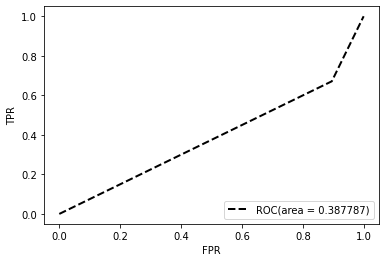

In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()
lw = 2
fpr, tpr, thresholds = roc_curve(combine_for_novelty_y_pd, combine_for_novelty_y_pred_df)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, 'k--', label = 'ROC(area = {0:2f})'.format(roc_auc), lw=2)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc = 'lower right')
plt.show()

In [ ]:
print(precision_score(combine_for_novelty_y_pd, combine_for_novelty_y_pred_df, average='macro'))

print(recall_score(combine_for_novelty_y_pd, combine_for_novelty_y_pred_df, average='macro'))

0.001383043882006599
0.22364217252396168


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# OverSample

In [ ]:
#from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE, ADASYN
#ros = RandomOverSampler(random_state=0)
#X_resampled, y_resampled = ros.fit_resample(df_x, df_labels)
X_resampled, y_resampled = SMOTE().fit_resample(df_x, df_labels)
from collections import Counter
print(sorted(Counter(y_resampled).items()))

[(0, 281470), (1, 281470)]


In [ ]:
X_with_labels_resampled=X_resampled.merge(y_resampled, left_index=True,right_index=True)

X_train_with_labels_resampled = pd.DataFrame(X_with_labels_resampled, index = set(X_with_labels_resampled.index).difference(set(class_896points.index))).reset_index()

X_train_with_labels_resampled_dropindex_56w=X_train_with_labels_resampled.drop('index',axis=1)

X_train_with_labels_resampled_dropindex=X_train_with_labels_resampled_dropindex_56w.sample(n=2000)

X_validation_with_labels_resampled,X_test_with_labels_resampled=model_selection.train_test_split(class_896points, test_size=0.5)

In [ ]:
X_train_with_labels_resampled_dropindex_56w

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620000,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0
2,1.000000,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660000,0
3,1.000000,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0
4,2.000000,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562039,122781.231144,-1.660816,-4.367198,-3.396015,1.393344,-1.579171,-0.677935,0.942392,-0.426042,0.923905,...,0.983060,-0.322741,-0.971050,0.362056,-0.350841,-0.763503,-0.065479,0.110782,1346.377765,1
562040,139535.297623,-1.334544,-0.673612,-3.566325,3.239936,1.460445,0.216619,-2.464492,0.468334,-0.773552,...,0.405017,1.223398,-0.145146,-1.518957,0.031233,0.332127,0.372357,0.497578,86.111133,1
562041,59096.624636,-3.540320,-4.179039,-3.184761,3.230394,-1.149830,-1.319928,-2.194098,0.659954,-0.755645,...,1.226224,-0.686913,-1.215737,-0.065535,0.243974,0.508835,0.421159,0.171792,1075.775471,1
562042,20697.821738,-16.114753,9.014838,-23.054788,11.854406,-9.289646,-2.421922,-16.757057,1.182800,-6.298444,...,-2.346247,1.019210,1.165672,-1.045581,-0.069280,0.661396,2.128355,-1.414206,1.000000,1


In [ ]:
X_train_resampled=X_train_with_labels_resampled_dropindex.drop('Class',axis=1)
y_train_resampled=X_train_with_labels_resampled_dropindex['Class']
X_validation_448points=X_validation_with_labels_resampled.drop('Class',axis=1)
y_validation_448points=X_validation_with_labels_resampled['Class']
X_test_448points=X_test_with_labels_resampled.drop('Class',axis=1)
y_test_448points=X_test_with_labels_resampled['Class']

X_train_resampled_norm=normalize(X_train_resampled)
X_validation_448points_norm=normalize(X_validation_448points)
X_test_448points_norm=normalize(X_test_448points)

In [ ]:
print(X_train_resampled_norm.shape)
print(X_validation_448points_norm.shape)
print(X_test_448points_norm.shape)
print(y_train_resampled.shape)
print(y_validation_448points.shape)
print(y_test_448points.shape)

(2000, 30)
(448, 30)
(448, 30)
(2000,)
(448,)
(448,)


Accuracy: 93.30%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


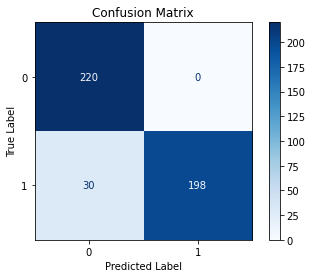

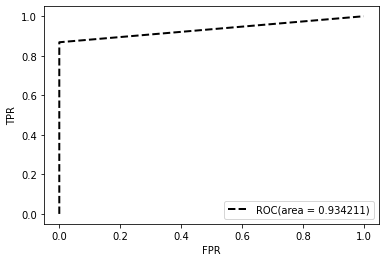

0.94
0.9342105263157895


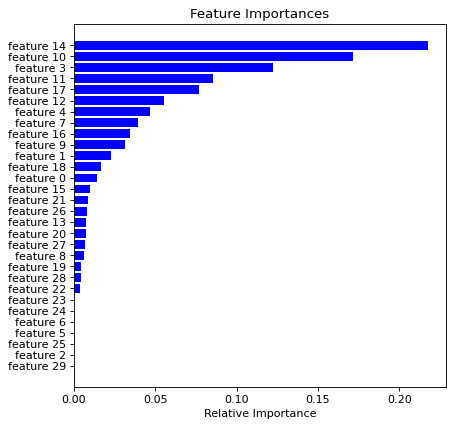

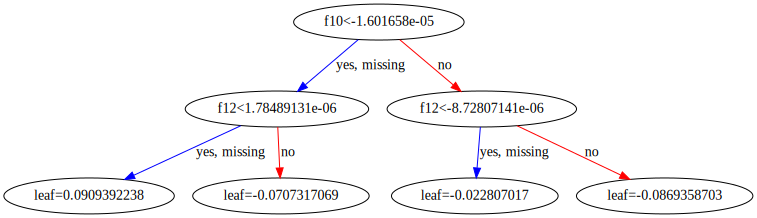

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", colsample_bytree=0.4, gamma=0.4, learning_rate=0.05, max_depth=2, min_child_weight=2, random_state=30)

xgb_model.fit(X_train_resampled_norm, y_train_resampled)

# make predictions for test data
y_pred = xgb_model.predict(X_validation_448points_norm)
predictions = [round(value) for value in y_pred]

accuracy = metrics.accuracy_score(y_validation_448points, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

color = 'black'
matrix = plot_confusion_matrix(xgb_model, X_validation_448points_norm, y_validation_448points, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()



fpr = dict()
tpr = dict()
roc_auc = dict()
lw = 2
fpr, tpr, thresholds = roc_curve(y_validation_448points, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, 'k--', label = 'ROC(area = {0:2f})'.format(roc_auc), lw=2)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc = 'lower right')
plt.show()



print(precision_score(y_validation_448points, y_pred, average='macro'))
print(recall_score(y_validation_448points, y_pred, average='macro'))



from matplotlib.pyplot import figure

figure(figsize=(6, 6), dpi=80)

features = [f"feature {i}" for i in range(X_train_resampled_norm.shape[1])]
importances = xgb_model.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()



xgb.to_graphviz(xgb_model)

Accuracy: 92.41%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


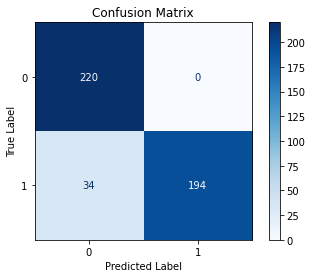

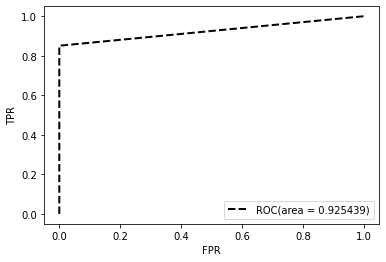

0.9330708661417323
0.9254385964912281


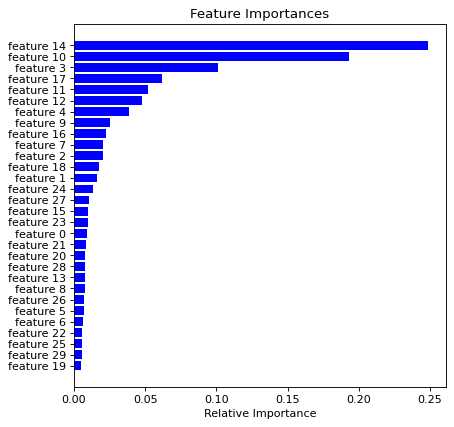

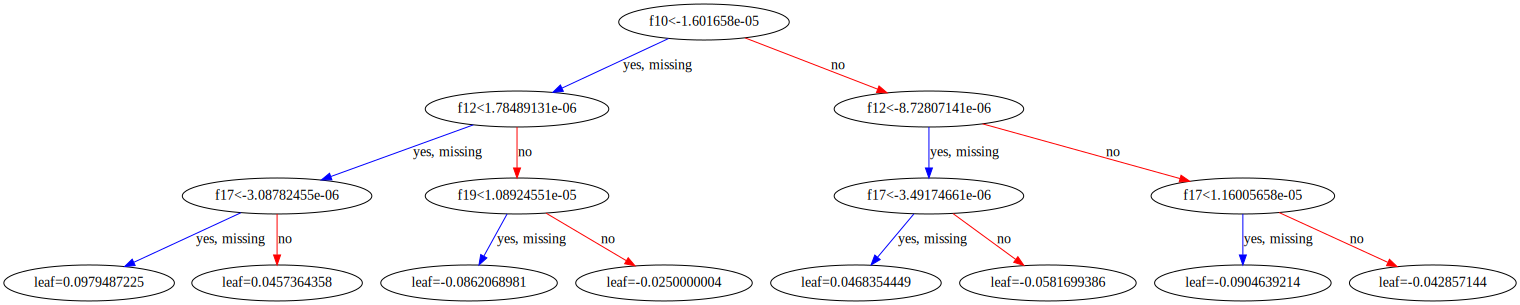

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", colsample_bytree=0.4, gamma=0.4, learning_rate=0.05, max_depth=3, min_child_weight=2, random_state=30)

xgb_model.fit(X_train_resampled_norm, y_train_resampled)

# make predictions for test data
y_pred = xgb_model.predict(X_validation_448points_norm)
predictions = [round(value) for value in y_pred]

accuracy = metrics.accuracy_score(y_validation_448points, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

color = 'black'
matrix = plot_confusion_matrix(xgb_model, X_validation_448points_norm, y_validation_448points, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()



fpr = dict()
tpr = dict()
roc_auc = dict()
lw = 2
fpr, tpr, thresholds = roc_curve(y_validation_448points, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, 'k--', label = 'ROC(area = {0:2f})'.format(roc_auc), lw=2)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc = 'lower right')
plt.show()



print(precision_score(y_validation_448points, y_pred, average='macro'))
print(recall_score(y_validation_448points, y_pred, average='macro'))



from matplotlib.pyplot import figure

figure(figsize=(6, 6), dpi=80)

features = [f"feature {i}" for i in range(X_train_resampled_norm.shape[1])]
importances = xgb_model.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()



xgb.to_graphviz(xgb_model)

Accuracy: 98.66%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


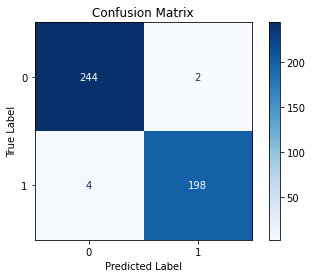

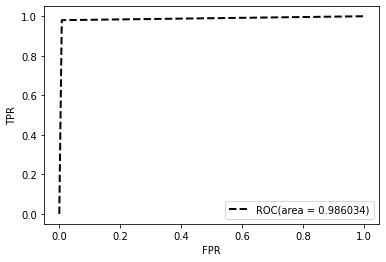

0.9869354838709677
0.9860339692505835


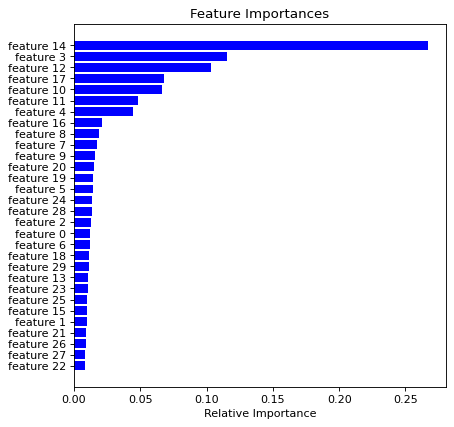

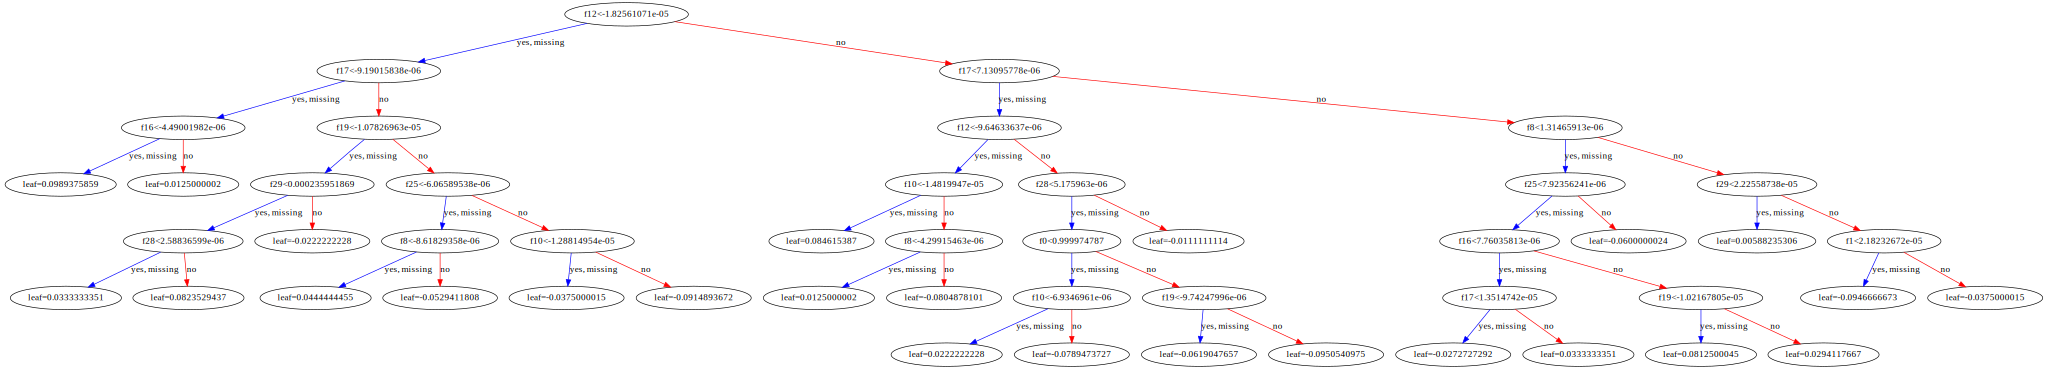

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", colsample_bytree=0.4, gamma=0.4, learning_rate=0.05, max_depth=6, min_child_weight=3, random_state=30)

xgb_model.fit(X_train_resampled_norm, y_train_resampled)

# make predictions for test data
y_pred = xgb_model.predict(X_validation_448points_norm)
predictions = [round(value) for value in y_pred]

accuracy = metrics.accuracy_score(y_validation_448points, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

color = 'black'
matrix = plot_confusion_matrix(xgb_model, X_validation_448points_norm, y_validation_448points, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()



fpr = dict()
tpr = dict()
roc_auc = dict()
lw = 2
fpr, tpr, thresholds = roc_curve(y_validation_448points, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, 'k--', label = 'ROC(area = {0:2f})'.format(roc_auc), lw=2)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc = 'lower right')
plt.show()



print(precision_score(y_validation_448points, y_pred, average='macro'))
print(recall_score(y_validation_448points, y_pred, average='macro'))



from matplotlib.pyplot import figure

figure(figsize=(6, 6), dpi=80)

features = [f"feature {i}" for i in range(X_train_resampled_norm.shape[1])]
importances = xgb_model.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()



xgb.to_graphviz(xgb_model)

# Neural Network 1

In [ ]:
train_x

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
10720,18675.0,-12.339603,4.488267,-16.587073,10.107274,-10.420199,0.130670,-15.600323,-1.157696,-5.304631,...,-0.085501,-2.089610,1.745315,1.376816,-0.554271,-1.610741,0.153725,1.212477,-1.869290,188.78
245428,153761.0,1.146259,1.403458,-4.159148,2.660107,-0.323217,-1.836071,-1.623740,0.259562,-1.132044,...,0.284831,0.564450,0.445744,-0.141136,-0.265517,0.362260,-0.416062,0.507370,0.243744,51.37
67506,52934.0,1.036639,0.407227,0.757706,3.161821,-0.568122,0.202181,-0.689804,0.411380,0.336769,...,-0.219461,-0.050108,0.123761,-0.132568,0.350231,0.507701,0.189621,0.061016,0.063141,0.76
42127,41194.0,-7.896886,5.381020,-8.451162,7.963928,-7.862419,-2.376820,-11.949723,5.051356,-6.912076,...,0.645974,2.557944,0.926278,0.032795,0.638073,0.361887,0.444577,1.101923,0.205958,1.52
56545,47826.0,-0.887287,1.390002,1.219686,1.661425,1.009228,-0.733908,0.855829,0.000077,-1.275631,...,-0.268347,-0.083734,-0.346930,-0.050619,0.231044,-0.450760,-0.376205,0.034504,0.157775,7.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150064,95864.0,-1.450866,1.032486,1.651114,-0.392442,0.087450,-0.083942,-0.000898,-1.917439,1.859504,...,-0.499376,1.481902,0.143226,0.093620,-0.051822,-0.049400,0.335456,0.071066,-0.076957,24.00
119752,76056.0,-3.740916,-9.292963,-1.878266,1.668138,-4.134113,1.124395,2.200306,-0.386296,-0.260465,...,4.758886,0.999262,-2.422490,-2.172608,0.134474,-0.958143,0.641461,-0.511114,0.457603,2616.00
201943,135102.0,1.862102,-0.124052,-1.989752,0.382609,0.473032,-0.674517,0.298621,-0.282416,0.802053,...,0.150727,-0.204158,-0.511441,0.077874,0.388335,0.007896,-0.120980,-0.019579,0.006155,108.51
152865,101597.0,0.913116,1.145381,-4.602878,2.091803,-0.473224,-2.085436,-1.671244,0.094397,0.337799,...,0.508985,0.401416,-0.084933,-0.197684,-0.283271,0.387597,-0.553527,0.516274,0.270828,147.87


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

model = Sequential([
    Dense(units=12, input_dim=30,activation='relu'),
    Dense(units=9, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                372       
                                                                 
 dense_1 (Dense)             (None, 9)                 117       
                                                                 
 dense_2 (Dense)             (None, 1)                 10        
                                                                 
Total params: 499
Trainable params: 499
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy'])

In [ ]:
history = model.fit(x=train_x_norm, y=train_y, epochs=5000)

Streaming output truncated to the last 5000 lines.
Epoch 2501/5000
20/20 [==============================] - 0s 4ms/step - loss: 0.1843 - accuracy: 0.9345
Epoch 2502/5000
20/20 [==============================] - 0s 2ms/step - loss: 0.1646 - accuracy: 0.9393
Epoch 2503/5000
20/20 [==============================] - 0s 3ms/step - loss: 0.1669 - accuracy: 0.9409
Epoch 2504/5000
20/20 [==============================] - 0s 2ms/step - loss: 0.1854 - accuracy: 0.9297
Epoch 2505/5000
20/20 [==============================] - 0s 2ms/step - loss: 0.1802 - accuracy: 0.9393
Epoch 2506/5000
20/20 [==============================] - 0s 3ms/step - loss: 0.2081 - accuracy: 0.9249
Epoch 2507/5000
20/20 [==============================] - 0s 2ms/step - loss: 0.1915 - accuracy: 0.9521
Epoch 2508/5000
20/20 [==============================] - 0s 2ms/step - loss: 0.1579 - accuracy: 0.9409
Epoch 2509/5000
20/20 [==============================] - 0s 2ms/step - loss: 0.1642 - accuracy: 0.9441
Epoch 2510/5000
20/20 

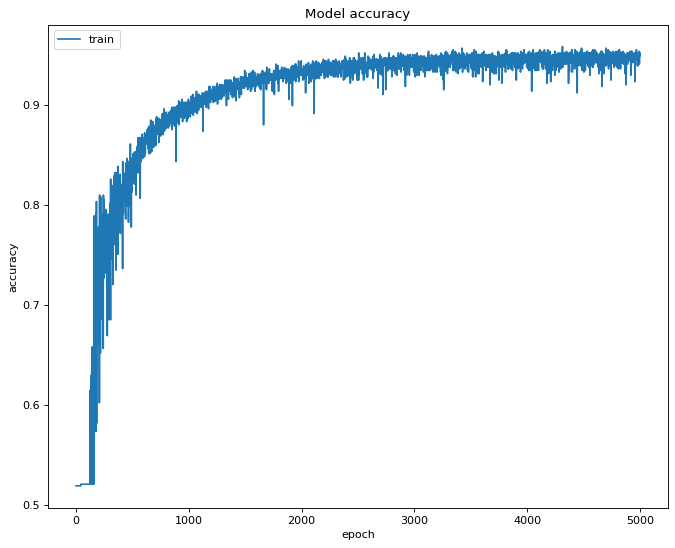

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8), dpi=80)
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

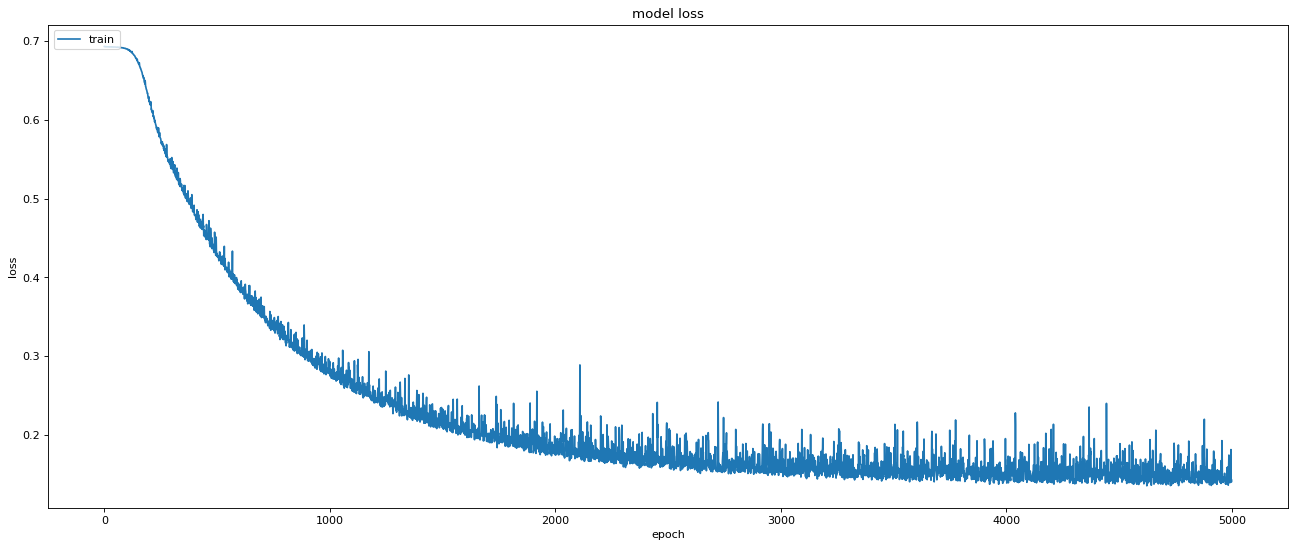

In [ ]:
# summarize history for loss
plt.figure(figsize=(20, 8), dpi=80)
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

6/6 [==============================] - 0s 2ms/step


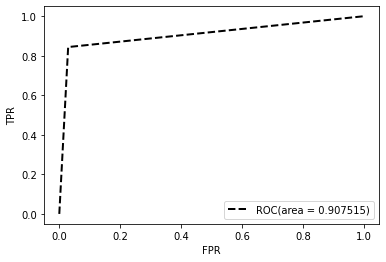

In [ ]:
y_pred = (model.predict(validation_x_norm) > 0.5).astype("int32")

fpr = dict()
tpr = dict()
roc_auc = dict()
lw = 2
fpr, tpr, thresholds = roc_curve(validation_y, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, 'k--', label = 'ROC(area = {0:2f})'.format(roc_auc), lw=2)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc = 'lower right')
plt.show()

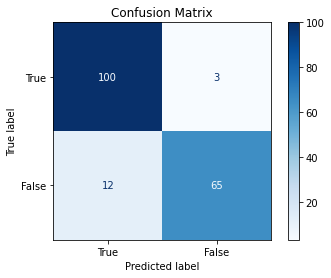

In [ ]:
import sklearn.metrics as metrics
from sklearn.metrics import ConfusionMatrixDisplay

color = 'black'
matrix = metrics.confusion_matrix(y_true=validation_y, y_pred=y_pred)  # shape=(12, 12)

disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=['True', 'False'])

disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix', color=color)
plt.show()

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print(precision_score(validation_y, y_pred, average='macro'))

print(recall_score(validation_y, y_pred, average='macro'))

0.9243697478991597
0.9075148152818056


In [ ]:
acc = model.evaluate(x=validation_x_norm, y=validation_y)

6/6 [==============================] - 0s 5ms/step - loss: 0.2125 - accuracy: 0.9167


# Neural Network 2

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_dim = 30),
  tf.keras.layers.Dense(12, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 30)                0         
                                                                 
 dense_3 (Dense)             (None, 12)                372       
                                                                 
 dropout (Dropout)           (None, 12)                0         
                                                                 
 dense_4 (Dense)             (None, 10)                130       
                                                                 
Total params: 502
Trainable params: 502
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cc = model.fit(train_x_norm, train_y, epochs=5000)

Streaming output truncated to the last 5000 lines.
Epoch 2501/5000
20/20 [==============================] - 0s 2ms/step - loss: 0.3297 - accuracy: 0.8722
Epoch 2502/5000
20/20 [==============================] - 0s 1ms/step - loss: 0.3316 - accuracy: 0.8786
Epoch 2503/5000
20/20 [==============================] - 0s 2ms/step - loss: 0.3360 - accuracy: 0.8658
Epoch 2504/5000
20/20 [==============================] - 0s 2ms/step - loss: 0.3356 - accuracy: 0.8882
Epoch 2505/5000
20/20 [==============================] - 0s 2ms/step - loss: 0.3376 - accuracy: 0.8770
Epoch 2506/5000
20/20 [==============================] - 0s 2ms/step - loss: 0.3254 - accuracy: 0.8818
Epoch 2507/5000
20/20 [==============================] - 0s 2ms/step - loss: 0.3310 - accuracy: 0.8802
Epoch 2508/5000
20/20 [==============================] - 0s 2ms/step - loss: 0.3402 - accuracy: 0.8770
Epoch 2509/5000
20/20 [==============================] - 0s 2ms/step - loss: 0.3555 - accuracy: 0.8546
Epoch 2510/5000
20/20 

In [ ]:
model.evaluate(validation_x_norm, validation_y, verbose=2)

6/6 - 0s - loss: 0.2332 - accuracy: 0.9222 - 172ms/epoch - 29ms/step


[0.23323777318000793, 0.9222221970558167]

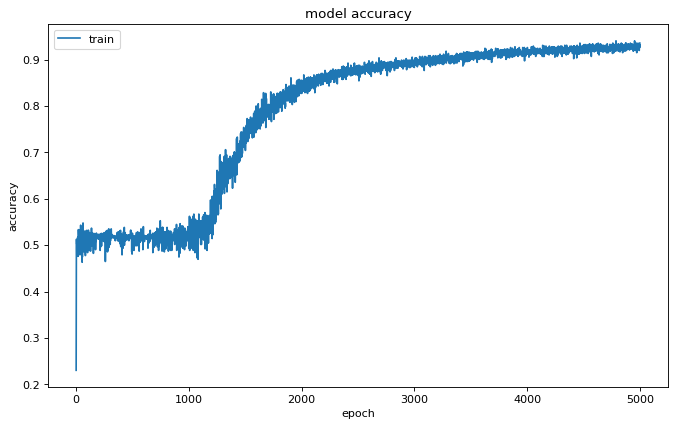

In [ ]:
figure(figsize=(10, 6), dpi=80)
plt.plot(cc.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

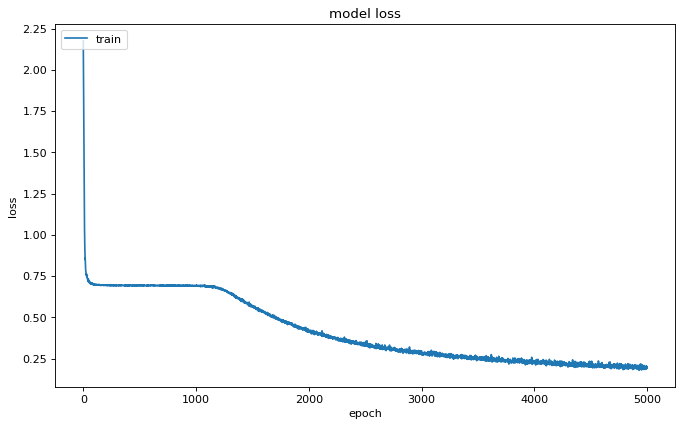

In [ ]:
# summarize history for loss
figure(figsize=(10, 6), dpi=80)
plt.plot(cc.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
y_pred = (model.predict(validation_x_norm) > 0.5).astype("int32")

fpr = dict()
tpr = dict()
roc_auc = dict()
lw = 2
fpr, tpr, thresholds = roc_curve(validation_y, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, 'k--', label = 'ROC(area = {0:2f})'.format(roc_auc), lw=2)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc = 'lower right')
plt.show()

6/6 [==============================] - 0s 2ms/step


ValueError: ignored

In [ ]:
import sklearn.metrics as metrics
from sklearn.metrics import ConfusionMatrixDisplay

color = 'black'
matrix = metrics.confusion_matrix(y_true=validation_y, y_pred=y_pred)  # shape=(12, 12)

disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=['True', 'False'])

disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix', color=color)
plt.show()